In [2]:

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#import missingno as msno
from scipy import stats

import numpy as np
import datetime
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import precision_score
from sklearn.metrics import precision_score

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



# Import recall_score
from sklearn.metrics import recall_score

#from sklearn.metrics import roc_auc_curve
# Import roc_curve
from sklearn.metrics import roc_curve



from sklearn.svm import SVC

# Import confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus



# Import train_test_split
from sklearn.model_selection import train_test_split

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression


from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



import scipy.stats as st
#import pandas_profiling
import requests 
%matplotlib inline

# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Import plotnine 
#import plotnine as p9

#######################################################
from scipy.stats import spearmanr

from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score 

from xgboost import XGBClassifier
from sklearn import tree
#from sklearn.metrics import accuracy_score
#from sklearn.linear_model import accuracy_score

#from xgboost import XGBClassifier
#import xgboost as xgb
 


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
# Semester Start Date:
StartDate = '2018-09-17' 
StartDate = pd.to_datetime(StartDate)


In [4]:
# Semester End Date:
EndDate = '2019-01-21' 
EndDate = pd.to_datetime(EndDate)

In [5]:
TriOne = '2018-10-22'
TriOne = pd.to_datetime(TriOne)

In [6]:
TriTwo = '2018-11-26'
TriTwo = pd.to_datetime(TriTwo)

In [7]:
#BEGIN7
#Will use own grades and moodle logs to merge
# Module 7 has weeks and 14 students grades.14 passed the module with 0 failures.
#Module 7 is a 2nd year group and would be considered more mature and settled.
#The class sizes are very small (<15).Module 7 has two continuous assessments.
#
#

In [7]:
# Begin7 Data Preperation Module 7
# 3 Files in Module 7
# Module 7

module7ml = pd.read_csv('Module7-MoodleLogs.csv')

In [8]:
module7mg = pd.read_csv('Module7-MoodleGrades.csv')

In [9]:
module7og = pd.read_csv('Module7-OwnGrades.csv')

In [10]:
print (module7mg.columns.tolist())


['First name', 'Surname', 'ID number', 'Email address', 'CA2 - Practical Exam (Real)', 'Quiz: CA3 - Theory Test (Real)', 'Last downloaded from this course']


In [11]:
# Print the number of unique values in each modul7mg column
print(module7mg.nunique())

First name                          14
Surname                             14
ID number                           14
Email address                       14
CA2 - Practical Exam (Real)         14
Quiz: CA3 - Theory Test (Real)      14
Last downloaded from this course     1
dtype: int64


In [12]:
print (module7og.columns.tolist())


['ID number', 'First Name', 'Surname', 'Total CA Mark / 100', 'Final Grade', 'CA1 Report / 20', 'CA2 Lab Test / 35', 'CA3 Theory Test / 35', 'Labs CA / 10', 'Wk1-Lab', 'Wk1-Lecture', 'Wk2-CA / 1', 'Wk2-Lab', 'Wk2-Lecture', 'Wk3-CA / 1', 'Wk3-Lab', 'Wk3-Lecture', 'Wk4-CA / 1', 'Wk4-Lab', 'Wk4-Lecture', 'Wk5-CA / 1.5', 'Wk5-Lab', 'Wk5-Lecture', 'Wk6-CA / 1', 'Wk6-Lab', 'Wk6-Lecture', 'Wk7-CA / 1', 'Wk7-Lab', 'Wk7-Lecture', 'Wk8-CA / 1.5', 'Wk8-Lab', 'Wk8-Lecture', 'Wk9-CA2', 'Wk9-Lecture', 'Wk10-CA / 1', 'Wk10-Lab', 'Wk10-Lecture', 'Wk11-CA / 1', 'Wk11-Lab', 'Wk11-Lecture', 'Wk12-CA3', 'Wk12-Lecture', 'Wk15-Lecture']


In [13]:
module7og.dtypes


ID number                object
First Name               object
Surname                  object
Total CA Mark / 100     float64
Final Grade              object
CA1 Report / 20         float64
CA2 Lab Test / 35       float64
CA3 Theory Test / 35    float64
Labs CA / 10            float64
Wk1-Lab                  object
Wk1-Lecture              object
Wk2-CA / 1                int64
Wk2-Lab                  object
Wk2-Lecture              object
Wk3-CA / 1              float64
Wk3-Lab                  object
Wk3-Lecture              object
Wk4-CA / 1                int64
Wk4-Lab                  object
Wk4-Lecture              object
Wk5-CA / 1.5            float64
Wk5-Lab                  object
Wk5-Lecture              object
Wk6-CA / 1              float64
Wk6-Lab                  object
Wk6-Lecture              object
Wk7-CA / 1              float64
Wk7-Lab                  object
Wk7-Lecture              object
Wk8-CA / 1.5            float64
Wk8-Lab                  object
Wk8-Lect

In [14]:

#Engaged = > 55
engaged7 = module7og['Total CA Mark / 100'] > 55


In [15]:

# Create a new column called df.engaged where the value is yes
# if df.age is greater than 55 and no if not
module7og['engaged'] = np.where(module7og['Total CA Mark / 100']>=55, '1', '0')


In [16]:
module7og['engaged'] = pd.to_numeric(module7og['engaged'])


In [17]:
print(module7og['engaged'].value_counts(dropna=False))

1    11
0     3
Name: engaged, dtype: int64


In [18]:
m7og = module7og

In [18]:
#Cleanup7OG

In [19]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk1-Lecture'] = m7og['Wk1-Lecture'].replace({'N': 0 , 'Y': 1})


In [20]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk2-Lecture'] = m7og['Wk2-Lecture'].replace({'N': 0 , 'Y': 1})


In [21]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk3-Lecture'] = m7og['Wk3-Lecture'].replace({'N': 0 , 'Y': 1})


In [22]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk4-Lecture'] = m7og['Wk4-Lecture'].replace({'N': 0 , 'Y': 1})


In [23]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk5-Lecture'] = m7og['Wk5-Lecture'].replace({'N': 0 , 'Y': 1})

In [24]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk6-Lecture'] = m7og['Wk6-Lecture'].replace({'N': 0 , 'Y': 1})

In [25]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk7-Lecture'] = m7og['Wk7-Lecture'].replace({'N': 0 , 'Y': 1})

In [26]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk8-Lecture'] = m7og['Wk8-Lecture'].replace({'N': 0 , 'Y': 1})

In [27]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk9-Lecture'] = m7og['Wk9-Lecture'].replace({'N': 0 , 'Y': 1})

In [28]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk10-Lecture'] = m7og['Wk10-Lecture'].replace({'N': 0 , 'Y': 1})

In [29]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk11-Lecture'] = m7og['Wk11-Lecture'].replace({'N': 0 , 'Y': 1})

In [30]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk12-Lecture'] = m7og['Wk12-Lecture'].replace({'N': 0 , 'Y': 1})

In [31]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk15-Lecture'] = m7og['Wk15-Lecture'].replace({'N': 0 , 'Y': 1})

In [32]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk1-Lab'] = m7og['Wk1-Lab'].replace({'N': 0 , 'Y': 1})

In [33]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk2-Lab'] = m7og['Wk2-Lab'].replace({'N': 0 , 'Y': 1})

In [34]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk3-Lab'] = m7og['Wk3-Lab'].replace({'N': 0 , 'Y': 1})

In [35]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk4-Lab'] = m7og['Wk4-Lab'].replace({'N': 0 , 'Y': 1})

In [36]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk5-Lab'] = m7og['Wk5-Lab'].replace({'N': 0 , 'Y': 1})

In [37]:
# Replace 'no' with 0 and 'yes' with 1 in 'W6-Lecture'  in Module 7

m7og['Wk6-Lab'] = m7og['Wk6-Lab'].replace({'N': 0 , 'Y': 1})

In [38]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk7-Lecture'  in Module 7

m7og['Wk7-Lab'] = m7og['Wk7-Lab'].replace({'N': 0 , 'Y': 1})

In [39]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk8-Lecture'  in Module 7

m7og['Wk8-Lab'] = m7og['Wk8-Lab'].replace({'N': 0 , 'Y': 1})

In [40]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk9-Lecture'  in Module 7

m7og['Wk9-CA2'] = m7og['Wk9-CA2'].replace({'N': 0 , 'Y': 1})

In [41]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk10-Lab'] = m7og['Wk10-Lab'].replace({'N': 0 , 'Y': 1})

In [42]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk11-Lab'] = m7og['Wk11-Lab'].replace({'N': 0 , 'Y': 1})

In [43]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk12-CA3'] = m7og['Wk12-CA3'].replace({'N': 0 , 'Y': 1})

In [44]:
m7og.head(2)

ID number First Name Surname  Total CA Mark / 100 Final Grade  \
0  tzCYvQBD       azCY    bvQB               71.850          B+   
1  FjdRQnjO       ajdR    bQnj               89.885           A   

   CA1 Report / 20  CA2 Lab Test / 35  CA3 Theory Test / 35  Labs CA / 10  \
0              8.8             27.650                 25.40         10.00   
1             16.2             30.975                 33.05          9.66   

   Wk1-Lab  ...  Wk10-CA / 1  Wk10-Lab  Wk10-Lecture  Wk11-CA / 1  Wk11-Lab  \
0        1  ...          1.0         1             1         1.00         1   
1        1  ...          1.0         1             1         0.66         1   

   Wk11-Lecture  Wk12-CA3  Wk12-Lecture  Wk15-Lecture  engaged  
0             1         1             1             1        1  
1             1         1             1             1        1  

[2 rows x 44 columns]

In [45]:
X7ss = m7og.iloc[:,5:43]  #independent columns
y7ss = m7og.iloc[:,-1]    #target column i.e engaged


In [46]:
X7ss.head(2)

CA1 Report / 20  CA2 Lab Test / 35  CA3 Theory Test / 35  Labs CA / 10  \
0              8.8             27.650                 25.40         10.00   
1             16.2             30.975                 33.05          9.66   

   Wk1-Lab  Wk1-Lecture  Wk2-CA / 1  Wk2-Lab  Wk2-Lecture  Wk3-CA / 1  ...  \
0        1            1           1        1            1         1.0  ...   
1        1            1           1        1            1         1.0  ...   

   Wk9-Lecture  Wk10-CA / 1  Wk10-Lab  Wk10-Lecture  Wk11-CA / 1  Wk11-Lab  \
0            1          1.0         1             1         1.00         1   
1            1          1.0         1             1         0.66         1   

   Wk11-Lecture  Wk12-CA3  Wk12-Lecture  Wk15-Lecture  
0             1         1             1             1  
1             1         1             1             1  

[2 rows x 38 columns]

In [47]:
y7ss.head(2)

0    1
1    1
Name: engaged, dtype: int64

In [48]:
#apply SelectKBest class to extract top 8 best features
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X7ss,y7ss)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X7ss.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                   Specs      Score
1      CA2 Lab Test / 35  24.183153
0        CA1 Report / 20   6.339336
2   CA3 Theory Test / 35   3.262709
24          Wk8-CA / 1.5   0.502090
3           Labs CA / 10   0.403440
5            Wk1-Lecture   0.282051
26           Wk8-Lecture   0.282051
30              Wk10-Lab   0.223140
18            Wk6-CA / 1   0.164053
20           Wk6-Lecture   0.090909


[0.14223496 0.13045735 0.07446978 0.02792295 0.         0.10001268
 0.         0.         0.         0.02793002 0.         0.
 0.         0.         0.         0.03884114 0.         0.00056566
 0.06972833 0.         0.00175754 0.05084848 0.         0.
 0.05232121 0.03859463 0.07790831 0.         0.         0.07678023
 0.03493951 0.00122766 0.02157576 0.01501007 0.00270202 0.
 0.         0.01417172]


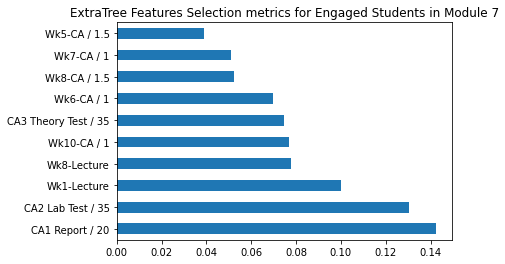

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X7ss,y7ss)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X7ss.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('ExtraTree Features Selection metrics for Engaged Students in Module 7')
plt.show()


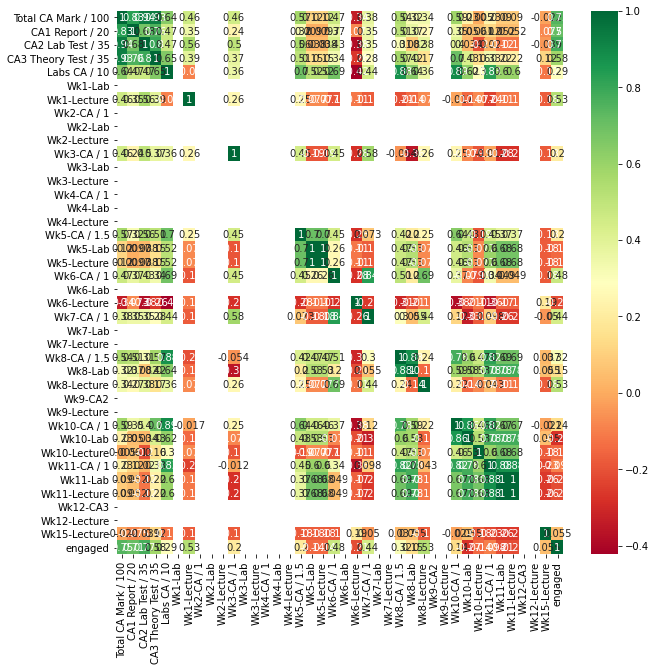

In [50]:
#get correlations of each features in dataset
corrmat = m7og.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(m7og[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [51]:
spear1 = m7og['CA2 Lab Test / 35']

In [52]:
spear2 = m7og['engaged']

In [53]:
spearcorr = stats.spearmanr(spear1,spear2)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=0.7125253031944253, pvalue=0.00424047706080388)


In [54]:
spear3 = m7og['CA1 Report / 20']

In [55]:
spearcorr = stats.spearmanr(spear3,spear2)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=0.6939908707108333, pvalue=0.005898567572400877)


In [56]:
spear4 = m7og['CA3 Theory Test / 35']

In [57]:
spearcorr = stats.spearmanr(spear4,spear2)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=0.6261585997769192, pvalue=0.01659021417242484)


In [58]:
m7og['Total CA Mark / 100'].mean()

68.45196428571428

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~

In [59]:
m7og_subset = m7og

In [60]:
m7og_subset.head(2)

ID number First Name Surname  Total CA Mark / 100 Final Grade  \
0  tzCYvQBD       azCY    bvQB               71.850          B+   
1  FjdRQnjO       ajdR    bQnj               89.885           A   

   CA1 Report / 20  CA2 Lab Test / 35  CA3 Theory Test / 35  Labs CA / 10  \
0              8.8             27.650                 25.40         10.00   
1             16.2             30.975                 33.05          9.66   

   Wk1-Lab  ...  Wk10-CA / 1  Wk10-Lab  Wk10-Lecture  Wk11-CA / 1  Wk11-Lab  \
0        1  ...          1.0         1             1         1.00         1   
1        1  ...          1.0         1             1         0.66         1   

   Wk11-Lecture  Wk12-CA3  Wk12-Lecture  Wk15-Lecture  engaged  
0             1         1             1             1        1  
1             1         1             1             1        1  

[2 rows x 44 columns]

In [61]:
#Feature selection7
Xm7og = m7og_subset.iloc[:,5:43]  #independent columns
ym7og = m7og.iloc[:,-1]    #target column i.e engaged


In [62]:
Xm7og.head(2)

CA1 Report / 20  CA2 Lab Test / 35  CA3 Theory Test / 35  Labs CA / 10  \
0              8.8             27.650                 25.40         10.00   
1             16.2             30.975                 33.05          9.66   

   Wk1-Lab  Wk1-Lecture  Wk2-CA / 1  Wk2-Lab  Wk2-Lecture  Wk3-CA / 1  ...  \
0        1            1           1        1            1         1.0  ...   
1        1            1           1        1            1         1.0  ...   

   Wk9-Lecture  Wk10-CA / 1  Wk10-Lab  Wk10-Lecture  Wk11-CA / 1  Wk11-Lab  \
0            1          1.0         1             1         1.00         1   
1            1          1.0         1             1         0.66         1   

   Wk11-Lecture  Wk12-CA3  Wk12-Lecture  Wk15-Lecture  
0             1         1             1             1  
1             1         1             1             1  

[2 rows x 38 columns]

In [63]:
ym7og.head(2)

0    1
1    1
Name: engaged, dtype: int64

In [64]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xm7og,ym7og)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xm7og.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                   Specs      Score
1      CA2 Lab Test / 35  24.183153
0        CA1 Report / 20   6.339336
2   CA3 Theory Test / 35   3.262709
24          Wk8-CA / 1.5   0.502090
3           Labs CA / 10   0.403440
5            Wk1-Lecture   0.282051
26           Wk8-Lecture   0.282051
30              Wk10-Lab   0.223140
18            Wk6-CA / 1   0.164053
20           Wk6-Lecture   0.090909


[0.12402896 0.15812692 0.1044024  0.02593434 0.         0.09477687
 0.         0.         0.         0.02207071 0.         0.
 0.         0.         0.         0.01188047 0.00480808 0.00717348
 0.06444608 0.         0.00324683 0.05546799 0.         0.
 0.08042524 0.02469197 0.05933289 0.         0.         0.07111995
 0.03755506 0.00280303 0.01446128 0.01255556 0.01139895 0.
 0.         0.00929293]


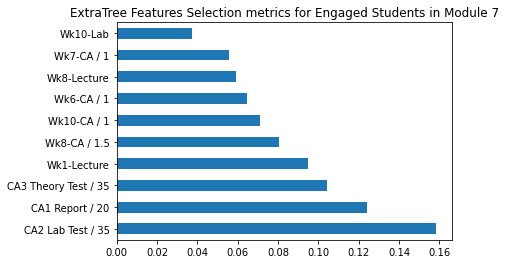

In [65]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Xm7og,ym7og)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Xm7og.columns)
plt.title('ExtraTree Features Selection metrics for Engaged Students in Module 7')
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


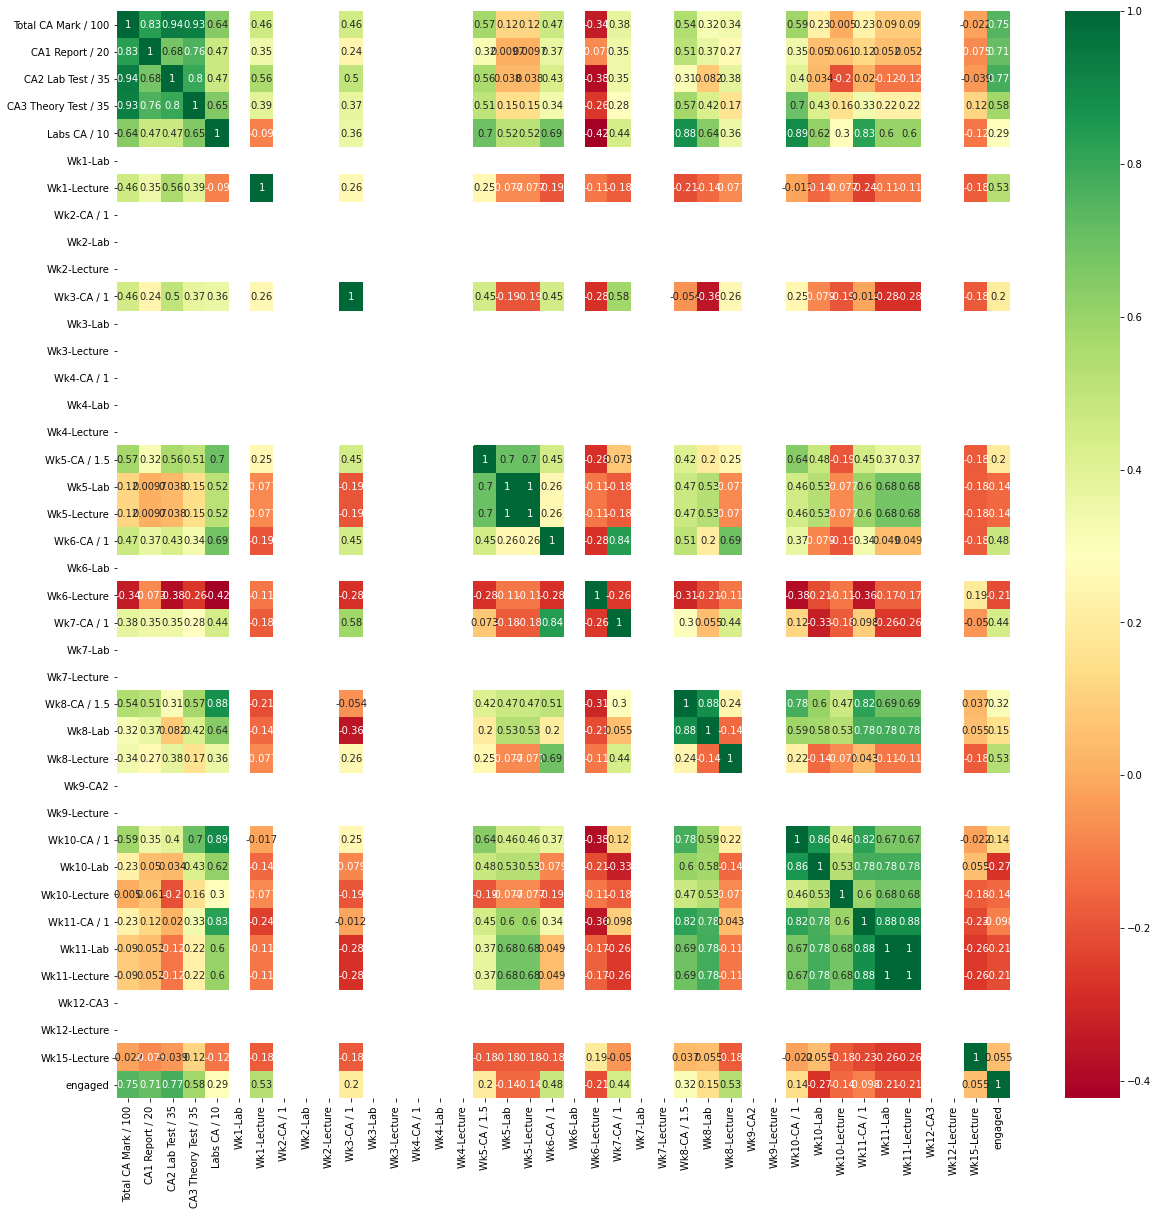

In [66]:
#get correlations of each features in dataset
corrmat = m7og_subset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(m7og_subset[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [67]:
m7og.dtypes


ID number                object
First Name               object
Surname                  object
Total CA Mark / 100     float64
Final Grade              object
CA1 Report / 20         float64
CA2 Lab Test / 35       float64
CA3 Theory Test / 35    float64
Labs CA / 10            float64
Wk1-Lab                   int64
Wk1-Lecture               int64
Wk2-CA / 1                int64
Wk2-Lab                   int64
Wk2-Lecture               int64
Wk3-CA / 1              float64
Wk3-Lab                   int64
Wk3-Lecture               int64
Wk4-CA / 1                int64
Wk4-Lab                   int64
Wk4-Lecture               int64
Wk5-CA / 1.5            float64
Wk5-Lab                   int64
Wk5-Lecture               int64
Wk6-CA / 1              float64
Wk6-Lab                   int64
Wk6-Lecture               int64
Wk7-CA / 1              float64
Wk7-Lab                   int64
Wk7-Lecture               int64
Wk8-CA / 1.5            float64
Wk8-Lab                   int64
Wk8-Lect

In [68]:
# Print the number of unique values in each modul7og column
print(module7og.nunique())

ID number               14
First Name              14
Surname                 14
Total CA Mark / 100     14
Final Grade              6
CA1 Report / 20         10
CA2 Lab Test / 35       14
CA3 Theory Test / 35    14
Labs CA / 10            10
Wk1-Lab                  1
Wk1-Lecture              2
Wk2-CA / 1               1
Wk2-Lab                  1
Wk2-Lecture              1
Wk3-CA / 1               3
Wk3-Lab                  1
Wk3-Lecture              1
Wk4-CA / 1               1
Wk4-Lab                  1
Wk4-Lecture              1
Wk5-CA / 1.5             3
Wk5-Lab                  2
Wk5-Lecture              2
Wk6-CA / 1               3
Wk6-Lab                  1
Wk6-Lecture              2
Wk7-CA / 1               2
Wk7-Lab                  1
Wk7-Lecture              1
Wk8-CA / 1.5             4
Wk8-Lab                  2
Wk8-Lecture              2
Wk9-CA2                  1
Wk9-Lecture              1
Wk10-CA / 1              5
Wk10-Lab                 2
Wk10-Lecture             2
W

In [69]:
# Print the number of unique values in each modul6mg column
print(module7ml.nunique())

Time              1369
User full name      14
Affected user        1
Event context       43
ct                  10
Event name          27
Description         70
Origin               1
IP address           1
dtype: int64


In [58]:
# Cleanup7


In [70]:
#time7
time7 = module7ml["Time"].str.split(",", n = 1, expand = True)

In [71]:
# making separate Date column from new data frame 
module7ml["Date"]= time7[0] 

# making seperate Time column from new data frame
module7ml['Time']= time7[1]


In [72]:
# Convert the date column to datetime64
module7ml.Date = pd.to_datetime(module7ml.Date)

In [73]:
# new data frame with split value columns 
new7 = module7ml["User full name"].str.split(" ", n = 1, expand = True)


In [74]:
# making separate first name column from new data frame 
module7ml["First name"]= new7[0] 

# making separate last name column from new data frame 
module7ml["Last name"]= new7[1] 


In [75]:
module7ml.head(2)

Time User full name Affected user     Event context           ct  \
0   15:46      am5M b1HG             -  Course: Module 7       System   
1   05:48      am5M b1HG             -  Course: Module 7  User report   

                 Event name  \
0             Course viewed   
1  Grade user report viewed   

                                         Description Origin IP address  \
0  The user with id '0' viewed the course with id...    web  127.0.0.1   
1  The user with id '0' viewed the user report in...    web  127.0.0.1   

        Date First name Last name  
0 2019-01-18       am5M      b1HG  
1 2019-01-15       am5M      b1HG

In [76]:
module7ml.drop(module7ml[['IP address','Origin','Description','Affected user']], axis=1)

Time User full name     Event context           ct  \
0      15:46      am5M b1HG  Course: Module 7       System   
1      05:48      am5M b1HG  Course: Module 7  User report   
2      05:48      am5M b1HG  Course: Module 7       System   
3      15:59      ajdR bQnj  Course: Module 7       System   
4      15:59      ajdR bQnj  Course: Module 7  User report   
...      ...            ...               ...          ...   
3162   14:15      aw97 baOy  Course: Module 7       System   
3163   14:15      aw97 baOy  Course: Module 7       System   
3164   14:15      aJGs bxon  Course: Module 7       System   
3165   14:14      aJGs bxon  Course: Module 7       System   
3166   14:14      aJGs bxon  Course: Module 7       System   

                    Event name       Date First name Last name  
0                Course viewed 2019-01-18       am5M      b1HG  
1     Grade user report viewed 2019-01-15       am5M      b1HG  
2                Course viewed 2019-01-15       am5M      b1HG  
3                Course viewed 2019-12-01       ajdR      bQnj  
4     Grade user report viewed 2019-12-01       ajdR      bQnj  
...                        ...        ...        ...       ...  
3162             Role assigned 2018-09-17       aw97      baOy  
3163   User enrolled in course 2018-09-17       aw97      baOy  
3164             Course viewed 2018-09-17       aJGs      bxon  
3165             Role assigned 2018-09-17       aJGs      bxon  
3166   User enrolled in course 2018-09-17       aJGs      bxon  

[3167 rows x 8 columns]

In [77]:
module7ml.head(2)

Time User full name Affected user     Event context           ct  \
0   15:46      am5M b1HG             -  Course: Module 7       System   
1   05:48      am5M b1HG             -  Course: Module 7  User report   

                 Event name  \
0             Course viewed   
1  Grade user report viewed   

                                         Description Origin IP address  \
0  The user with id '0' viewed the course with id...    web  127.0.0.1   
1  The user with id '0' viewed the user report in...    web  127.0.0.1   

        Date First name Last name  
0 2019-01-18       am5M      b1HG  
1 2019-01-15       am5M      b1HG

In [78]:
# Onehot7
module7ml_onehot = module7ml.copy()
module7ml_onehot = pd.get_dummies(module7ml_onehot, columns=['Event name'], prefix = ['Event name'])
module7ml_onehot = pd.get_dummies(module7ml_onehot, columns=['Event context'], prefix = ['Event context'])
module7ml_onehot = pd.get_dummies(module7ml_onehot, columns=['ct'], prefix = ['ct'])


print(module7ml_onehot.head())


     Time User full name Affected user  \
0   15:46      am5M b1HG             -   
1   05:48      am5M b1HG             -   
2   05:48      am5M b1HG             -   
3   15:59      ajdR bQnj             -   
4   15:59      ajdR bQnj             -   

                                         Description Origin IP address  \
0  The user with id '0' viewed the course with id...    web  127.0.0.1   
1  The user with id '0' viewed the user report in...    web  127.0.0.1   
2  The user with id '0' viewed the course with id...    web  127.0.0.1   
3  The user with id '0' viewed the course with id...    web  127.0.0.1   
4  The user with id '0' viewed the user report in...    web  127.0.0.1   

        Date First name Last name  Event name_A file has been uploaded.  ...  \
0 2019-01-18       am5M      b1HG                                     0  ...   
1 2019-01-15       am5M      b1HG                                     0  ...   
2 2019-01-15       am5M      b1HG                             

In [79]:
module7ml_onehot.head(2)

Time User full name Affected user  \
0   15:46      am5M b1HG             -   
1   05:48      am5M b1HG             -   

                                         Description Origin IP address  \
0  The user with id '0' viewed the course with id...    web  127.0.0.1   
1  The user with id '0' viewed the user report in...    web  127.0.0.1   

        Date First name Last name  Event name_A file has been uploaded.  ...  \
0 2019-01-18       am5M      b1HG                                     0  ...   
1 2019-01-15       am5M      b1HG                                     0  ...   

   ct_Assignment  ct_File  ct_File submissions  ct_Forum  ct_Overview report  \
0              0        0                    0         0                   0   
1              0        0                    0         0                   0   

   ct_Quiz  ct_System  ct_Turnitin Assignment 2  ct_URL  ct_User report  
0        0          1                         0       0               0  
1        0          0                         0       0               1  

[2 rows x 89 columns]

In [80]:
module7ml_onehot.drop(module7ml_onehot[['IP address','Origin','Description','Affected user']], axis=1)

Time User full name       Date First name Last name  \
0      15:46      am5M b1HG 2019-01-18       am5M      b1HG   
1      05:48      am5M b1HG 2019-01-15       am5M      b1HG   
2      05:48      am5M b1HG 2019-01-15       am5M      b1HG   
3      15:59      ajdR bQnj 2019-12-01       ajdR      bQnj   
4      15:59      ajdR bQnj 2019-12-01       ajdR      bQnj   
...      ...            ...        ...        ...       ...   
3162   14:15      aw97 baOy 2018-09-17       aw97      baOy   
3163   14:15      aw97 baOy 2018-09-17       aw97      baOy   
3164   14:15      aJGs bxon 2018-09-17       aJGs      bxon   
3165   14:14      aJGs bxon 2018-09-17       aJGs      bxon   
3166   14:14      aJGs bxon 2018-09-17       aJGs      bxon   

      Event name_A file has been uploaded.  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
...                                    ...   
3162                                     0   
3163                                     0   
3164                                     0   
3165                                     0   
3166                                     0   

      Event name_A submission has been submitted.  Event name_Add Submission  \
0                                               0                          0   
1                                               0                          0   
2                                               0                          0   
3                                               0                          0   
4                                               0                          0   
...                                           ...                        ...   
3162                                            0                          0   
3163                                            0                          0   
3164                                            0                          0   
3165                                            0                          0   
3166                                            0                          0   

      Event name_Badge listing viewed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   
...                               ...   
3162                                0   
3163                                0   
3164                                0   
3165                                0   
3166                                0   

      Event name_Course module instance list viewed  ...  ct_Assignment  \
0                                                 0  ...              0   
1                                                 0  ...              0   
2                                                 0  ...              0   
3                                                 0  ...              0   
4                                                 0  ...              0   
...                                             ...  ...            ...   
3162                                              0  ...              0   
3163                                              0  ...              0   
3164                                              0  ...              0   
3165                                              0  ...              0   
3166                                              0  ...              0   

      ct_File  ct_File submissions  ct_Forum  ct_Overview report  ct_Quiz  \
0           0                    0         0                   0        0   
1           0                    0         0                   0        0   
2           0                    0         0                   0        0   
3           0                    0 

In [81]:
module7ml_onehot.head(2)

Time User full name Affected user  \
0   15:46      am5M b1HG             -   
1   05:48      am5M b1HG             -   

                                         Description Origin IP address  \
0  The user with id '0' viewed the course with id...    web  127.0.0.1   
1  The user with id '0' viewed the user report in...    web  127.0.0.1   

        Date First name Last name  Event name_A file has been uploaded.  ...  \
0 2019-01-18       am5M      b1HG                                     0  ...   
1 2019-01-15       am5M      b1HG                                     0  ...   

   ct_Assignment  ct_File  ct_File submissions  ct_Forum  ct_Overview report  \
0              0        0                    0         0                   0   
1              0        0                    0         0                   0   

   ct_Quiz  ct_System  ct_Turnitin Assignment 2  ct_URL  ct_User report  
0        0          1                         0       0               0  
1        0          0                         0       0               1  

[2 rows x 89 columns]

In [82]:
m7ml_subset = module7ml.drop(module7ml[['IP address','Origin','Description','Affected user']], axis=1)

In [83]:
m7ml_subset.head(2)

Time User full name     Event context           ct  \
0   15:46      am5M b1HG  Course: Module 7       System   
1   05:48      am5M b1HG  Course: Module 7  User report   

                 Event name       Date First name Last name  
0             Course viewed 2019-01-18       am5M      b1HG  
1  Grade user report viewed 2019-01-15       am5M      b1HG

In [84]:
m7og_subset.head(2)

ID number First Name Surname  Total CA Mark / 100 Final Grade  \
0  tzCYvQBD       azCY    bvQB               71.850          B+   
1  FjdRQnjO       ajdR    bQnj               89.885           A   

   CA1 Report / 20  CA2 Lab Test / 35  CA3 Theory Test / 35  Labs CA / 10  \
0              8.8             27.650                 25.40         10.00   
1             16.2             30.975                 33.05          9.66   

   Wk1-Lab  ...  Wk10-CA / 1  Wk10-Lab  Wk10-Lecture  Wk11-CA / 1  Wk11-Lab  \
0        1  ...          1.0         1             1         1.00         1   
1        1  ...          1.0         1             1         0.66         1   

   Wk11-Lecture  Wk12-CA3  Wk12-Lecture  Wk15-Lecture  engaged  
0             1         1             1             1        1  
1             1         1             1             1        1  

[2 rows x 44 columns]

In [85]:

# Rename the columns of df2_melted: df2_tidy
m7og_subset_tidy = m7og_subset.rename(columns = {'First Name': 'First name',}, inplace = False)


In [86]:
m7og_subset_tidy.head(2)

ID number First name Surname  Total CA Mark / 100 Final Grade  \
0  tzCYvQBD       azCY    bvQB               71.850          B+   
1  FjdRQnjO       ajdR    bQnj               89.885           A   

   CA1 Report / 20  CA2 Lab Test / 35  CA3 Theory Test / 35  Labs CA / 10  \
0              8.8             27.650                 25.40         10.00   
1             16.2             30.975                 33.05          9.66   

   Wk1-Lab  ...  Wk10-CA / 1  Wk10-Lab  Wk10-Lecture  Wk11-CA / 1  Wk11-Lab  \
0        1  ...          1.0         1             1         1.00         1   
1        1  ...          1.0         1             1         0.66         1   

   Wk11-Lecture  Wk12-CA3  Wk12-Lecture  Wk15-Lecture  engaged  
0             1         1             1             1        1  
1             1         1             1             1        1  

[2 rows x 44 columns]

In [87]:
len(m7og_subset_tidy)

14

In [88]:
#Mergesub7
merge_subset7 = pd.merge(module7ml_onehot,m7og_subset_tidy[['First name','engaged']],on='First name', how='left')

In [89]:
merge_subset7.head(2)

Time User full name Affected user  \
0   15:46      am5M b1HG             -   
1   05:48      am5M b1HG             -   

                                         Description Origin IP address  \
0  The user with id '0' viewed the course with id...    web  127.0.0.1   
1  The user with id '0' viewed the user report in...    web  127.0.0.1   

        Date First name Last name  Event name_A file has been uploaded.  ...  \
0 2019-01-18       am5M      b1HG                                     0  ...   
1 2019-01-15       am5M      b1HG                                     0  ...   

   ct_File  ct_File submissions  ct_Forum  ct_Overview report  ct_Quiz  \
0        0                    0         0                   0        0   
1        0                    0         0                   0        0   

   ct_System  ct_Turnitin Assignment 2  ct_URL  ct_User report  engaged  
0          1                         0       0               0        1  
1          0                         0       0               1        1  

[2 rows x 90 columns]

In [90]:
merge_subset7 = merge_subset7.drop(merge_subset7[['IP address','Origin','Description','Affected user']], axis=1)

In [91]:
merge_subset7.head(2)

Time User full name       Date First name Last name  \
0   15:46      am5M b1HG 2019-01-18       am5M      b1HG   
1   05:48      am5M b1HG 2019-01-15       am5M      b1HG   

   Event name_A file has been uploaded.  \
0                                     0   
1                                     0   

   Event name_A submission has been submitted.  Event name_Add Submission  \
0                                            0                          0   
1                                            0                          0   

   Event name_Badge listing viewed  \
0                                0   
1                                0   

   Event name_Course module instance list viewed  ...  ct_File  \
0                                              0  ...        0   
1                                              0  ...        0   

   ct_File submissions  ct_Forum  ct_Overview report  ct_Quiz  ct_System  \
0                    0         0                   0        0          1   
1                    0         0                   0        0          0   

   ct_Turnitin Assignment 2  ct_URL  ct_User report  engaged  
0                         0       0               0        1  
1                         0       0               1        1  

[2 rows x 86 columns]

In [92]:
merge_subset7.dtypes

Time                                object
User full name                      object
Date                        datetime64[ns]
First name                          object
Last name                           object
                                 ...      
ct_System                            uint8
ct_Turnitin Assignment 2             uint8
ct_URL                               uint8
ct_User report                       uint8
engaged                              int64
Length: 86, dtype: object

In [93]:
merge_subset7.head(2)

Time User full name       Date First name Last name  \
0   15:46      am5M b1HG 2019-01-18       am5M      b1HG   
1   05:48      am5M b1HG 2019-01-15       am5M      b1HG   

   Event name_A file has been uploaded.  \
0                                     0   
1                                     0   

   Event name_A submission has been submitted.  Event name_Add Submission  \
0                                            0                          0   
1                                            0                          0   

   Event name_Badge listing viewed  \
0                                0   
1                                0   

   Event name_Course module instance list viewed  ...  ct_File  \
0                                              0  ...        0   
1                                              0  ...        0   

   ct_File submissions  ct_Forum  ct_Overview report  ct_Quiz  ct_System  \
0                    0         0                   0        0          1   
1                    0         0                   0        0          0   

   ct_Turnitin Assignment 2  ct_URL  ct_User report  engaged  
0                         0       0               0        1  
1                         0       0               1        1  

[2 rows x 86 columns]

In [94]:
len(merge_subset7)

3167

In [95]:
merge_subset7.head(6)

Time User full name       Date First name Last name  \
0   15:46      am5M b1HG 2019-01-18       am5M      b1HG   
1   05:48      am5M b1HG 2019-01-15       am5M      b1HG   
2   05:48      am5M b1HG 2019-01-15       am5M      b1HG   
3   15:59      ajdR bQnj 2019-12-01       ajdR      bQnj   
4   15:59      ajdR bQnj 2019-12-01       ajdR      bQnj   
5   15:59      ajdR bQnj 2019-12-01       ajdR      bQnj   

   Event name_A file has been uploaded.  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   
5                                     0   

   Event name_A submission has been submitted.  Event name_Add Submission  \
0                                            0                          0   
1                                            0                          0   
2                                            0                          0   
3                                            0                          0   
4                                            0                          0   
5                                            0                          0   

   Event name_Badge listing viewed  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   
5                                0   

   Event name_Course module instance list viewed  ...  ct_File  \
0                                              0  ...        0   
1                                              0  ...        0   
2                                              0  ...        0   
3                                              0  ...        0   
4                                              0  ...        0   
5                                              0  ...        0   

   ct_File submissions  ct_Forum  ct_Overview report  ct_Quiz  ct_System  \
0                    0         0                   0        0          1   
1                    0         0                   0        0          0   
2                    0         0                   0        0          1   
3                    0         0                   0        0          1   
4                    0         0                   0        0          0   
5                    0         0                   0        0          1   

   ct_Turnitin Assignment 2  ct_URL  ct_User report  engaged  
0                         0       0               0        1  
1                         0       0               1        1  
2                         0       0               0        1  
3                         0       0               0        1  
4                         0       0               1        1  
5                         0       0               0        1  

[6 rows x 86 columns]

In [96]:
#Feature selection
X7s = merge_subset7.iloc[:,5:85]  #independent columns
y7s = merge_subset7.iloc[:,-1]    #target column i.e engaged


In [97]:
X7s.head(2)

Event name_A file has been uploaded.  \
0                                     0   
1                                     0   

   Event name_A submission has been submitted.  Event name_Add Submission  \
0                                            0                          0   
1                                            0                          0   

   Event name_Badge listing viewed  \
0                                0   
1                                0   

   Event name_Course module instance list viewed  \
0                                              0   
1                                              0   

   Event name_Course module viewed  Event name_Course user report viewed  \
0                                0                                     0   
1                                0                                     0   

   Event name_Course viewed  Event name_Discussion viewed  \
0                         1                             0   
1                         0                             0   

   Event name_Grade overview report viewed  ...  ct_Assignment  ct_File  \
0                                        0  ...              0        0   
1                                        0  ...              0        0   

   ct_File submissions  ct_Forum  ct_Overview report  ct_Quiz  ct_System  \
0                    0         0                   0        0          1   
1                    0         0                   0        0          0   

   ct_Turnitin Assignment 2  ct_URL  ct_User report  
0                         0       0               0  
1                         0       0               1  

[2 rows x 80 columns]

In [98]:
y7s.head(6)

0    1
1    1
2    1
3    1
4    1
5    1
Name: engaged, dtype: int64

In [99]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X7s,y7s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X7s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                                                Specs      Score
10                Event name_Grade user report viewed  13.218453
79                                     ct_User report  13.218453
29                     Event context_Course: Module 7  11.446439
11                        Event name_List Submissions   9.813853
67  Event context_Turnitin Assignment 2: CA1 -SPCD...   9.141172
77                           ct_Turnitin Assignment 2   9.141172
52                 Event context_File: Lecture 10 - S   6.647707
7                            Event name_Course viewed   5.997823
76                                          ct_System   5.574013
12                   Event name_Quiz attempt reviewed   4.894887


[0.0020609  0.00207637 0.00342231 0.00873869 0.01127583 0.02646096
 0.01423842 0.02464332 0.00217673 0.00545409 0.04520545 0.03669679
 0.03533424 0.00131759 0.00114637 0.00146305 0.01230294 0.00116167
 0.00186589 0.00264247 0.00625629 0.00297118 0.00235213 0.00122548
 0.00074506 0.0037896  0.00075788 0.00479229 0.00664531 0.06459395
 0.0102827  0.00170348 0.02188893 0.00350533 0.00545748 0.01269856
 0.00184554 0.00721966 0.00832231 0.0011439  0.00115965 0.00707718
 0.04447364 0.02909839 0.00095484 0.00166412 0.02380678 0.00099308
 0.02136584 0.01524536 0.00234987 0.00136203 0.0631547  0.00567895
 0.00017703 0.00151702 0.01604215 0.02220077 0.00210364 0.00296269
 0.0256703  0.00794364 0.00894257 0.03614877 0.0044974  0.00273852
 0.01633001 0.03255371 0.01103288 0.00691614 0.00967549 0.01510169
 0.00558325 0.00525692 0.00661958 0.0101611  0.02747092 0.02272195
 0.01630957 0.05705671]


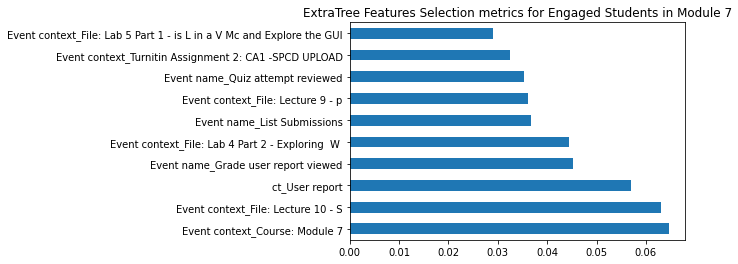

In [100]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X7s,y7s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X7s.columns)
plt.title('ExtraTree Features Selection metrics for Engaged Students in Module 7')
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


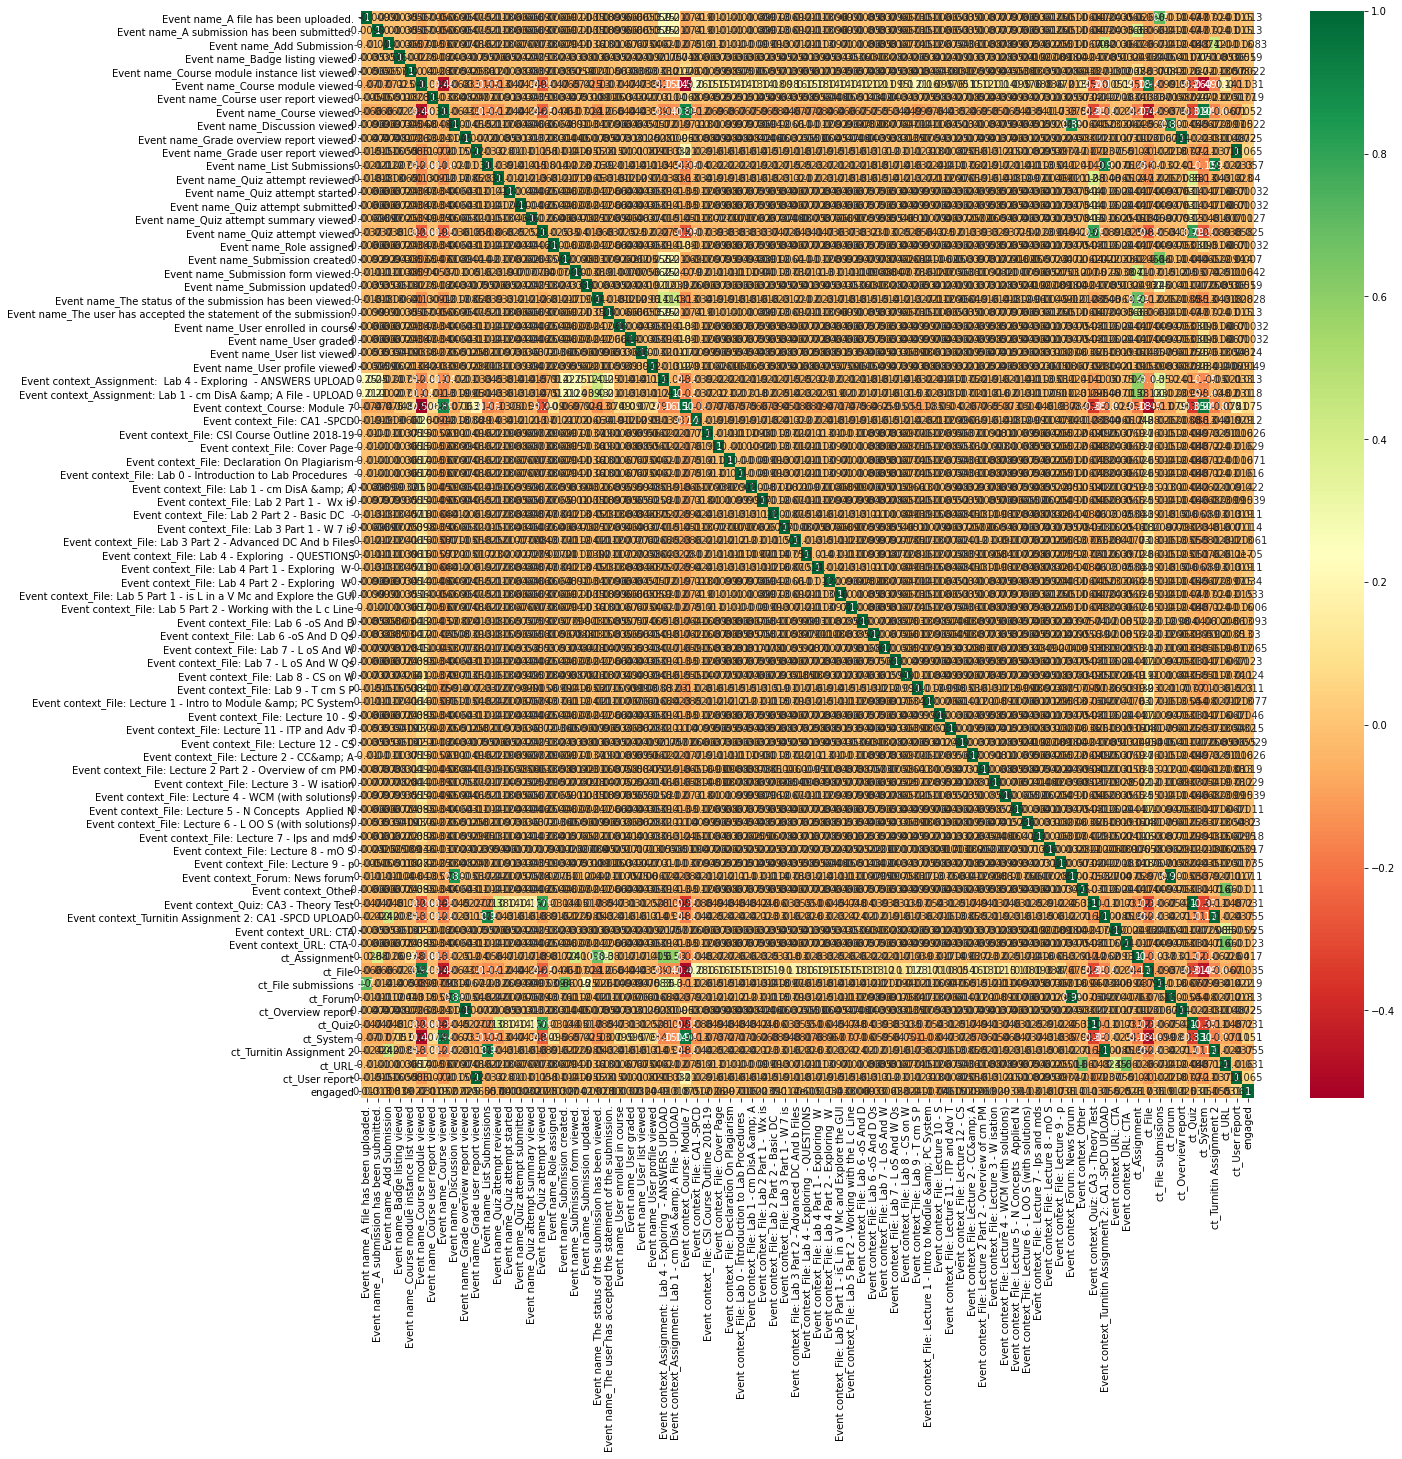

In [101]:
#get correlations of each features in dataset
corrmat = merge_subset7.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_subset7[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [102]:
X7s.columns

Index(['Event name_A file has been uploaded.',
       'Event name_A submission has been submitted.',
       'Event name_Add Submission', 'Event name_Badge listing viewed',
       'Event name_Course module instance list viewed',
       'Event name_Course module viewed',
       'Event name_Course user report viewed', 'Event name_Course viewed',
       'Event name_Discussion viewed',
       'Event name_Grade overview report viewed',
       'Event name_Grade user report viewed', 'Event name_List Submissions',
       'Event name_Quiz attempt reviewed', 'Event name_Quiz attempt started',
       'Event name_Quiz attempt submitted',
       'Event name_Quiz attempt summary viewed',
       'Event name_Quiz attempt viewed', 'Event name_Role assigned',
       'Event name_Submission created.', 'Event name_Submission form viewed.',
       'Event name_Submission updated.',
       'Event name_The status of the submission has been viewed.',
       'Event name_The user has accepted the statement of the 

In [103]:
featselect7 = X7s[['Event name_Grade user report viewed','ct_User report','Event context_Course: Module 7','Event name_List Submissions','Event context_Turnitin Assignment 2: CA1 -SPCD UPLOAD','ct_Turnitin Assignment 2','Event context_File: Lecture 10 - S','Event name_Course viewed','ct_System','Event name_Quiz attempt reviewed']]

In [93]:
# EndofFS7
# 10                Event name_Grade user report viewed  13.218453
#79                                     ct_User report  13.218453
#29                     Event context_Course: Module 7  11.446439
#11                        Event name_List Submissions   9.813853
#67  Event context_Turnitin Assignment 2: CA1 -SPCD...   9.141172
#77                           ct_Turnitin Assignment 2   9.141172
#52                 Event context_File: Lecture 10 - S   6.647707
#7                            Event name_Course viewed   5.997823
#76                                          ct_System   5.574013
#12                   Event name_Quiz attempt reviewed   4.894887
#

In [104]:
featselect7.head(2)

Event name_Grade user report viewed  ct_User report  \
0                                    0               0   
1                                    1               1   

   Event context_Course: Module 7  Event name_List Submissions  \
0                               1                            0   
1                               1                            0   

   Event context_Turnitin Assignment 2: CA1 -SPCD UPLOAD  \
0                                                  0       
1                                                  0       

   ct_Turnitin Assignment 2  Event context_File: Lecture 10 - S  \
0                         0                                   0   
1                         0                                   0   

   Event name_Course viewed  ct_System  Event name_Quiz attempt reviewed  
0                         1          1                                 0  
1                         0          0                                 0

In [105]:
Xfs7 = featselect7 # Features
yfs7 = y7s # Target variable


In [106]:

# Split dataset into training set and test set
Xfs7_train, Xfs7_test, yfs7_train, yfs7_test = train_test_split(Xfs7, yfs7, test_size=0.3, random_state=1) # 70% training and 30% test


In [244]:
# Create Decision Tree classifer object
dtclffs7 = DecisionTreeClassifier(max_depth =3,criterion ='gini',max_features =10)

# Train Decision Tree Classifer
dtclffs7 = dtclffs7.fit(Xfs7_train,yfs7_train)

#Predict the response for test dataset
yfs7_pred = dtclffs7.predict(Xfs7_test)


In [245]:
# Compute accuracy
print(dtclffs7.score(Xfs7_test, yfs7_test))

0.7718191377497371


In [173]:
cvscores_10dt = cross_val_score(dtclffs7, Xfs7_train, yfs7_train, cv = 10)
print(np.mean(cvscores_10dt))

0.7888100770453711


In [241]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"max_depth": [3, None, 9, 15],
              "max_features": [1, 3, 10],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search = GridSearchCV(dtclffs7, param_grid)

# Fit the model
grid_search.fit(Xfs7_test,yfs7_test)


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=9,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [242]:
# To identify the best hyperparameters.
grid_search.best_params_


{'criterion': 'gini', 'max_depth': 3, 'max_features': 10}

In [247]:
# Instantiate the classifier
rfclffs7 = RandomForestClassifier(n_estimators =1,bootstrap ='true',criterion = 'gini',max_depth = 3,max_features =3)

# Fit to the training data
rfclffs7.fit(Xfs7_train, yfs7_train)

# Compute accuracy
print(rfclffs7.score(Xfs7_test, yfs7_test))


0.7718191377497371


In [175]:
cvscores_10rf = cross_val_score(rfclffs7, Xfs7_train, yfs7_train, cv = 10)
print(np.mean(cvscores_10rf))

0.7888100770453711


In [239]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"max_depth": [3, 5, 9],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "n_estimators":[1, 5, 10, 20]}

# Call GridSearchCV
grid_search = GridSearchCV(rfclffs7, param_grid)

# Fit the model
grid_search.fit(Xfs7_test,yfs7_test)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              ran

In [240]:
# To identify the best hyperparameters.
grid_search.best_params_


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 3,
 'n_estimators': 1}

In [249]:
from sklearn.svm import SVC

svcfs7 = SVC(kernel ='linear',C=1.0)

#Train it, or "fit it", to the data:
svcfs7.fit(Xfs7_train, yfs7_train)

# Compute accuracy
print(svcfs7.score(Xfs7_test, yfs7_test))


0.7718191377497371


In [177]:
cvscores_10svc = cross_val_score(svcfs7, Xfs7_train, yfs7_train, cv = 10)
print(np.mean(cvscores_10svc))

0.7888100770453711


In [248]:

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {'kernel': ['linear', 'poly', 'rbf']
             ,'C':[0.1,0.5,1.0]}

# Call GridSearchCV
grid_search = GridSearchCV(svcfs7, param_grid)

# Fit the model
grid_search.fit(Xfs7_test, yfs7_test)

# Print the optimal parameters
print(grid_search.best_params_)


{'C': 1.0, 'kernel': 'linear'}


In [250]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregfs7 = LogisticRegression()

# fit the model with data
logregfs7.fit(Xfs7_train,yfs7_train)

#
ylg7_pred=logregfs7.predict(Xfs7_test)


In [251]:
# Compute accuracy
print(logregfs7.score(Xfs7_test, yfs7_test))


0.7718191377497371


In [179]:
cvscores_10 = cross_val_score(logregfs7, Xfs7_train, yfs7_train, cv = 10)
print(np.mean(cvscores_10))

0.7888100770453711


In [105]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yfs7_test, yfs7_pred))


Accuracy: 0.77181913775


In [106]:
# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(yfs7_test, yfs7_pred))


0.77181913775


In [107]:
# Import recall_score - Perfect recall score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(yfs7_test, yfs7_pred))


1.0


In [108]:
print("Accuracy:",metrics.accuracy_score(yfs7_test, yfs7_pred))
print("Precision:",metrics.precision_score(yfs7_test, yfs7_pred))
print("Recall:",metrics.recall_score(yfs7_test, yfs7_pred))
print("F1 Score",metrics.f1_score(yfs7_test, yfs7_pred))


Accuracy: 0.77181913775
Precision: 0.77181913775
Recall: 1.0
F1 Score 0.871216617211


In [109]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(yfs7_test, yfs7_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yfs7_test, yfs7_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yfs7_test, yfs7_pred)))

Mean Absolute Error: 0.22818086225
Mean Squared Error: 0.22818086225
Root Mean Squared Error: 0.47768280506


In [185]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yfs7_test, yfs7_pred))
print(classification_report(yfs7_test, yfs7_pred))


[[  0 217]
 [  0 734]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       217
           1       0.77      1.00      0.87       734

    accuracy                           0.77       951
   macro avg       0.39      0.50      0.44       951
weighted avg       0.60      0.77      0.67       951



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#````

In [186]:
# Instantiate bootstrap aggregation model
bagged_model = BaggingClassifier(n_estimators=50, random_state=123)

# Fit
bagged_model.fit(Xfs7_train, yfs7_train)

# Predict
bagged_pred = bagged_model.predict(Xfs7_test)

#print(logregfs1.score(Xfs_train, yfs_train))

# Print accuracy score
print(accuracy_score(yfs7_test, bagged_pred))


0.7718191377497371


In [252]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(bagged_model, Xfs7_train, yfs7_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(bagged_model, Xfs7_train, yfs7_train, cv = 10)
print(np.mean(cvscores_10))

0.7888085782075683
0.7888100770453711


In [187]:
# Boosting model
boosted_model = AdaBoostClassifier(n_estimators=50, random_state=123)

# Fit
boosted_model_fit = boosted_model.fit(Xfs7_train, yfs7_train)

# Predict
boosted_pred = boosted_model_fit.predict(Xfs7_test)

# Print model accuracy
print(accuracy_score(yfs7_test, boosted_pred))


0.7718191377497371


In [253]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(boosted_model, Xfs7_train, yfs7_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(boosted_model, Xfs7_train, yfs7_train, cv = 10)
print(np.mean(cvscores_10))

0.7888085782075683
0.7888100770453711


In [188]:
import xgboost as xgb

In [235]:
# Instantiate
xgb = XGBClassifier(random_state=123, learning_rate=0.1, n_estimators=10, max_depth=3)

# Fit
xgb = xgb.fit(Xfs7_train, yfs7_train)

# Predict
xgb_pred = xgb.predict(Xfs7_test)

# Print accuracy score
print('Final prediction score: [%.8f]' % accuracy_score(yfs7_test, xgb_pred))


Final prediction score: [0.77181914]


In [254]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(xgb, Xfs7_train, yfs7_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(xgb, Xfs7_train, yfs7_train, cv = 10)
print(np.mean(cvscores_10))

0.7888085782075683
0.7888100770453711


In [236]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yfs7_test, xgb_pred))
print(classification_report(yfs7_test, xgb_pred))


[[  0 217]
 [  0 734]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       217
           1       0.77      1.00      0.87       734

    accuracy                           0.77       951
   macro avg       0.39      0.50      0.44       951
weighted avg       0.60      0.77      0.67       951



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#````

In [107]:
len(m7ml_subset)

3167

In [108]:
#timeedit7
mask7 = (m7ml_subset['Date'] >= StartDate) & (m7ml_subset['Date'] <= EndDate)

m7ml_subset = m7ml_subset.loc[mask7]

len(m7ml_subset)


2420

In [109]:
#Remove activity outside semester start and end dates range -Timeedit1
week5_7 = (module7ml['Date'] >= StartDate) & (module7ml['Date'] <= TriOne)

FirstFive7 = module7ml.loc[week5_7]
len(FirstFive7)


1605

In [110]:
#Remove activity outside semester start and end dates range -Timeedit1
week10_7 = (module7ml['Date'] >= TriOne) & (module7ml['Date'] <= TriTwo)

FirstTen7 = module7ml.loc[week10_7]

len(FirstTen7)


1019

In [111]:
#Remove activity outside semester start and end dates range -Timeedit1
week15_7 = (module7ml['Date'] >= TriTwo) & (module7ml['Date'] <= EndDate)

FirstFivt7 = module7ml.loc[week15_7]

len(FirstFivt7)


214

In [ ]:

#Trimester1

In [112]:
FirstFive7.head(2)

Time User full name Affected user          Event context      ct  \
112   21:25      ajrV bTes             -  File: Lab 8 - CS on W    File   
113   21:25      ajrV bTes             -       Course: Module 7  System   

               Event name                                        Description  \
112  Course module viewed  The user with id '0' viewed the 'resource' act...   
113         Course viewed  The user with id '0' viewed the course with id...   

    Origin IP address       Date First name Last name  
112    web  127.0.0.1 2018-10-12       ajrV      bTes  
113    web  127.0.0.1 2018-10-12       ajrV      bTes

In [113]:
FirstFive7= FirstFive7.drop(FirstFive7[['IP address','Origin','Description','Affected user']], axis=1)


In [114]:
FirstFive7.head(2)

Time User full name          Event context      ct  \
112   21:25      ajrV bTes  File: Lab 8 - CS on W    File   
113   21:25      ajrV bTes       Course: Module 7  System   

               Event name       Date First name Last name  
112  Course module viewed 2018-10-12       ajrV      bTes  
113         Course viewed 2018-10-12       ajrV      bTes

In [115]:
FirstFive7_onehot = FirstFive7.copy()
FirstFive7_onehot = pd.get_dummies(FirstFive7_onehot, columns=['Event name'], prefix = ['Event name'])
FirstFive7_onehot = pd.get_dummies(FirstFive7_onehot, columns=['Event context'], prefix = ['Event context'])
FirstFive7_onehot = pd.get_dummies(FirstFive7_onehot, columns=['ct'], prefix = ['ct'])


print(FirstFive7_onehot.head())

###
#
# One-Hot encoding
# The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column.
# This has the benefit of not weighting a value improperly.
# https://www.datacamp.com/community/tutorials/categorical-data



       Time User full name       Date First name Last name  \
112   21:25      ajrV bTes 2018-10-12       ajrV      bTes   
113   21:25      ajrV bTes 2018-10-12       ajrV      bTes   
114   21:24      ajrV bTes 2018-10-12       ajrV      bTes   
115   21:24      ajrV bTes 2018-10-12       ajrV      bTes   
116   21:24      ajrV bTes 2018-10-12       ajrV      bTes   

     Event name_A file has been uploaded.  \
112                                     0   
113                                     0   
114                                     0   
115                                     0   
116                                     0   

     Event name_A submission has been submitted.  \
112                                            0   
113                                            0   
114                                            0   
115                                            0   
116                                            0   

     Event name_Badge listing viewed  \
112

In [116]:
FirstFive7_onehot.head(2)

Time User full name       Date First name Last name  \
112   21:25      ajrV bTes 2018-10-12       ajrV      bTes   
113   21:25      ajrV bTes 2018-10-12       ajrV      bTes   

     Event name_A file has been uploaded.  \
112                                     0   
113                                     0   

     Event name_A submission has been submitted.  \
112                                            0   
113                                            0   

     Event name_Badge listing viewed  \
112                                0   
113                                0   

     Event name_Course module instance list viewed  \
112                                              0   
113                                              0   

     Event name_Course module viewed  ...  Event context_URL: CTA    \
112                                1  ...                         0   
113                                0  ...                         0   

     ct_Assignment  ct_File  ct_File submissions  ct_Forum  ct_Quiz  \
112              0        1                    0         0        0   
113              0        0                    0         0        0   

     ct_System  ct_Turnitin Assignment 2  ct_URL  ct_User report  
112          0                         0       0               0  
113          1                         0       0               0  

[2 rows x 76 columns]

In [117]:
# new data frame with split value columns 
new7a = FirstFive7_onehot["User full name"].str.split(" ", n = 1, expand = True)


In [118]:
# making separate first name column from new data frame 
FirstFive7_onehot["First name"]= new7a[0] 

# making separate last name column from new data frame 
FirstFive7_onehot["Last name"]= new7a[1] 


In [119]:
FirstFive7_onehot.head(2)

Time User full name       Date First name Last name  \
112   21:25      ajrV bTes 2018-10-12       ajrV      bTes   
113   21:25      ajrV bTes 2018-10-12       ajrV      bTes   

     Event name_A file has been uploaded.  \
112                                     0   
113                                     0   

     Event name_A submission has been submitted.  \
112                                            0   
113                                            0   

     Event name_Badge listing viewed  \
112                                0   
113                                0   

     Event name_Course module instance list viewed  \
112                                              0   
113                                              0   

     Event name_Course module viewed  ...  Event context_URL: CTA    \
112                                1  ...                         0   
113                                0  ...                         0   

     ct_Assignment  ct_File  ct_File submissions  ct_Forum  ct_Quiz  \
112              0        1                    0         0        0   
113              0        0                    0         0        0   

     ct_System  ct_Turnitin Assignment 2  ct_URL  ct_User report  
112          0                         0       0               0  
113          1                         0       0               0  

[2 rows x 76 columns]

In [120]:
# Merge subset
merge_subset7_tri = pd.merge(FirstFive7_onehot,m7og_subset_tidy[['First name','engaged']],on='First name', how='left')

In [121]:
merge_subset7_tri.head(2)

Time User full name       Date First name Last name  \
0   21:25      ajrV bTes 2018-10-12       ajrV      bTes   
1   21:25      ajrV bTes 2018-10-12       ajrV      bTes   

   Event name_A file has been uploaded.  \
0                                     0   
1                                     0   

   Event name_A submission has been submitted.  \
0                                            0   
1                                            0   

   Event name_Badge listing viewed  \
0                                0   
1                                0   

   Event name_Course module instance list viewed  \
0                                              0   
1                                              0   

   Event name_Course module viewed  ...  ct_Assignment  ct_File  \
0                                1  ...              0        1   
1                                0  ...              0        0   

   ct_File submissions  ct_Forum  ct_Quiz  ct_System  \
0                    0         0        0          0   
1                    0         0        0          1   

   ct_Turnitin Assignment 2  ct_URL  ct_User report  engaged  
0                         0       0               0        1  
1                         0       0               0        1  

[2 rows x 77 columns]

In [122]:
X57s = merge_subset7_tri.iloc[:,5:76]  #independent columns
y57s = merge_subset7_tri.iloc[:,-1]    #target column i.e engaged


In [123]:
X57s.head(2)

Event name_A file has been uploaded.  \
0                                     0   
1                                     0   

   Event name_A submission has been submitted.  \
0                                            0   
1                                            0   

   Event name_Badge listing viewed  \
0                                0   
1                                0   

   Event name_Course module instance list viewed  \
0                                              0   
1                                              0   

   Event name_Course module viewed  Event name_Course user report viewed  \
0                                1                                     0   
1                                0                                     0   

   Event name_Course viewed  Event name_Discussion viewed  \
0                         0                             0   
1                         1                             0   

   Event name_Grade user report viewed  Event name_List Submissions  ...  \
0                                    0                            0  ...   
1                                    0                            0  ...   

   Event context_URL: CTA    ct_Assignment  ct_File  ct_File submissions  \
0                         0              0        1                    0   
1                         0              0        0                    0   

   ct_Forum  ct_Quiz  ct_System  ct_Turnitin Assignment 2  ct_URL  \
0         0        0          0                         0       0   
1         0        0          1                         0       0   

   ct_User report  
0               0  
1               0  

[2 rows x 71 columns]

In [124]:
y57s.head(2)

0    1
1    1
Name: engaged, dtype: int64

In [125]:

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X57s,y57s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X57s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36


                                             Specs      Score
59           Event context_Quiz: CA3 - Theory Test  12.376517
66                                         ct_Quiz  12.376517
10                Event name_Quiz attempt reviewed  12.065134
14                  Event name_Quiz attempt viewed   7.457069
6                         Event name_Course viewed   5.573043
47  Event context_File: Lecture 11 - ITP and Adv T   4.450696
44            Event context_File: Lab 9 - T cm S P   4.279605
46              Event context_File: Lecture 10 - S   4.279605
27                  Event context_Course: Module 7   4.239144
67                                       ct_System   3.798931


[0.00094465 0.00099803 0.00264915 0.0042059  0.03536174 0.01991026
 0.02212695 0.00221386 0.00121084 0.0014944  0.081493   0.00198017
 0.00160567 0.00268469 0.04640282 0.00269919 0.00150528 0.00895835
 0.00845881 0.0089315  0.00079808 0.00208136 0.00266409 0.00111944
 0.02033367 0.00604787 0.01347535 0.01895431 0.00230732 0.01539824
 0.02763894 0.01739679 0.0019571  0.00561701 0.01802197 0.00696318
 0.00897767 0.01432406 0.0044267  0.00335693 0.03077818 0.02787442
 0.005563   0.00271166 0.05791382 0.01252927 0.05799628 0.06138722
 0.00259446 0.01106092 0.00254216 0.01915709 0.00837179 0.00261507
 0.00082806 0.01892005 0.01872331 0.0229211  0.00827044 0.07440544
 0.00146874 0.00351892 0.00657408 0.00366911 0.00254591 0.01802473
 0.05268253 0.0115514  0.00097129 0.00311429 0.00101989]


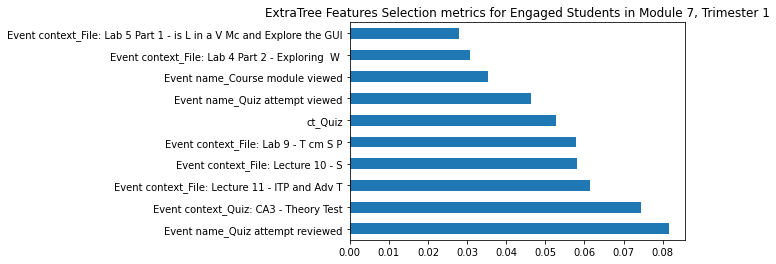

In [126]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X57s,y57s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X57s.columns)
plt.title('ExtraTree Features Selection metrics for Engaged Students in Module 7, Trimester 1')
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


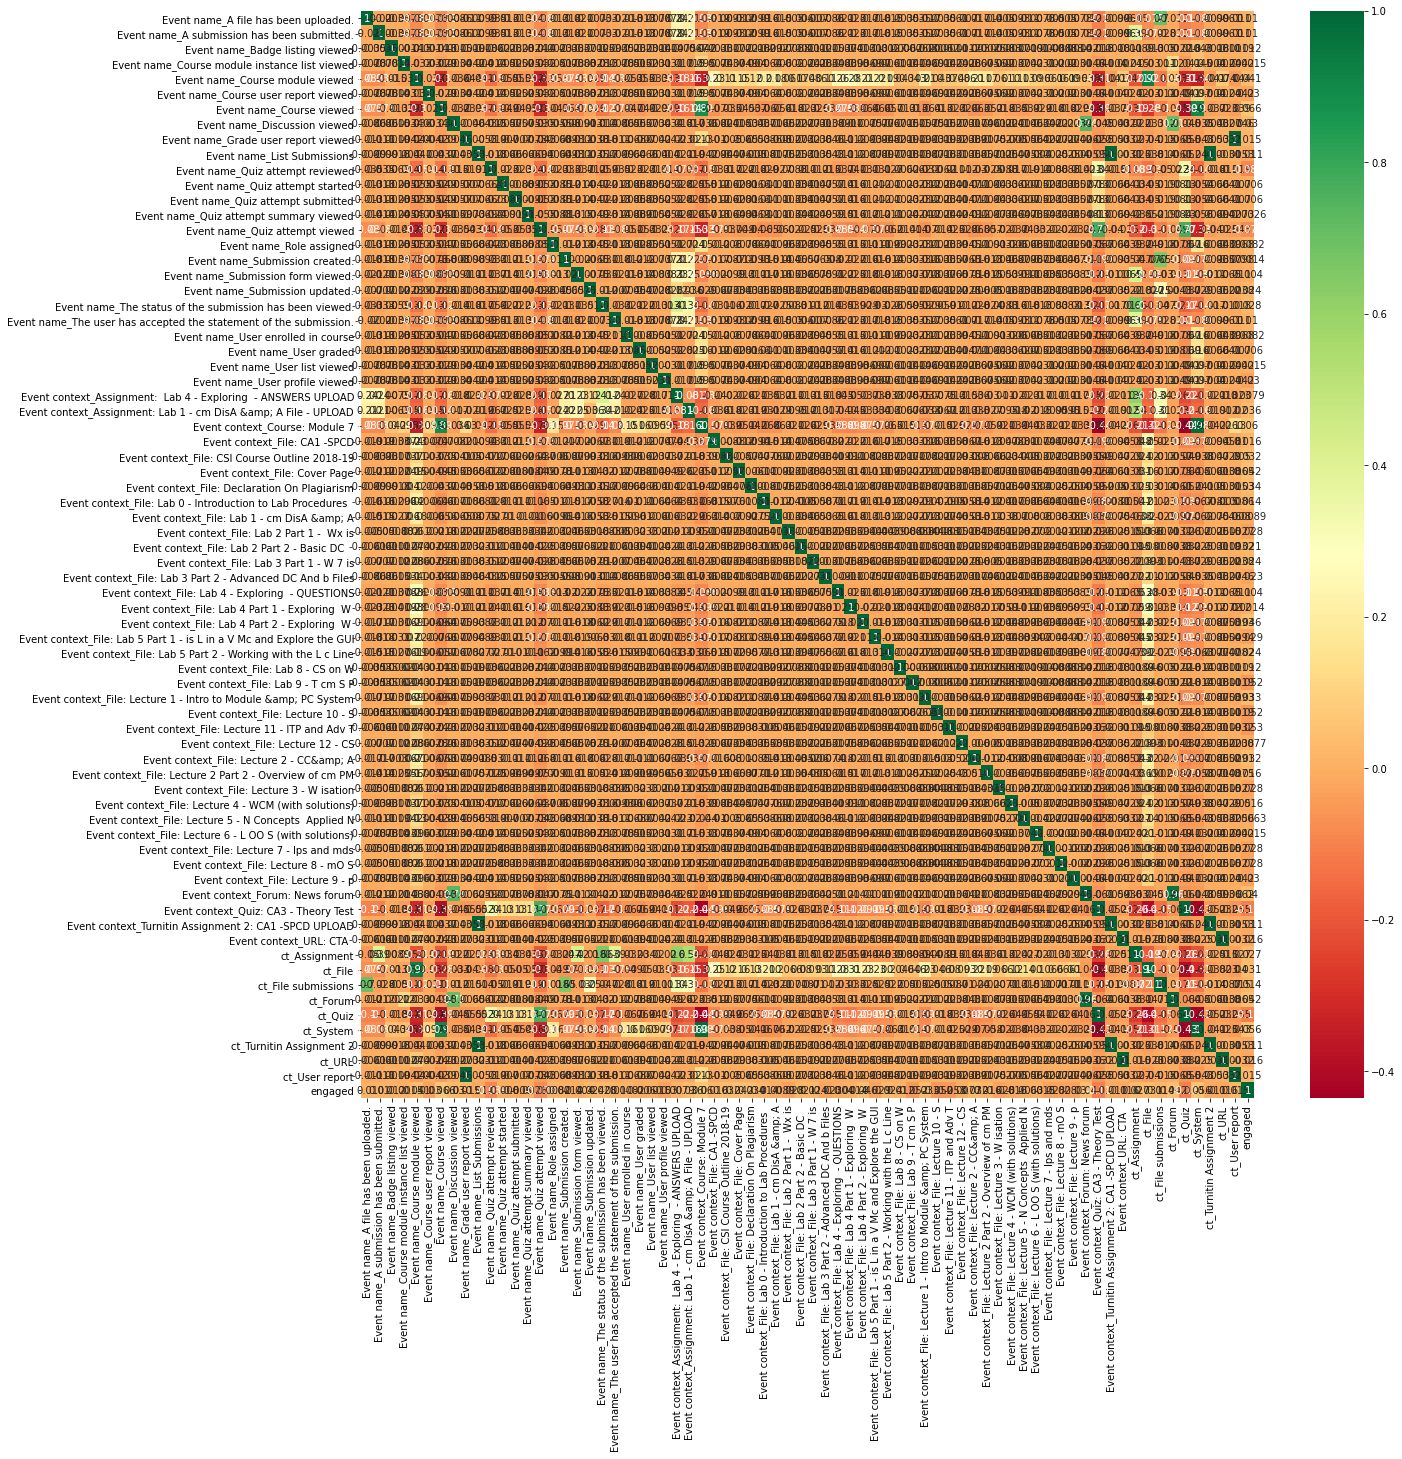

In [127]:
#get correlations of each features in dataset
corrmat = merge_subset7_tri.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_subset7_tri[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [128]:
X57s.columns

Index(['Event name_A file has been uploaded.',
       'Event name_A submission has been submitted.',
       'Event name_Badge listing viewed',
       'Event name_Course module instance list viewed',
       'Event name_Course module viewed',
       'Event name_Course user report viewed', 'Event name_Course viewed',
       'Event name_Discussion viewed', 'Event name_Grade user report viewed',
       'Event name_List Submissions', 'Event name_Quiz attempt reviewed',
       'Event name_Quiz attempt started', 'Event name_Quiz attempt submitted',
       'Event name_Quiz attempt summary viewed',
       'Event name_Quiz attempt viewed', 'Event name_Role assigned',
       'Event name_Submission created.', 'Event name_Submission form viewed.',
       'Event name_Submission updated.',
       'Event name_The status of the submission has been viewed.',
       'Event name_The user has accepted the statement of the submission.',
       'Event name_User enrolled in course', 'Event name_User graded',
 

In [ ]:
#
#59           Event context_Quiz: CA3 - Theory Test  12.376517
#66                                         ct_Quiz  12.376517
#10                Event name_Quiz attempt reviewed  12.065134
#14                  Event name_Quiz attempt viewed   7.457069
#6                         Event name_Course viewed   5.573043
#47  Event context_File: Lecture 11 - ITP and Adv T   4.450696
#44            Event context_File: Lab 9 - T cm S P   4.279605
#46              Event context_File: Lecture 10 - S   4.279605
#27                  Event context_Course: Module 7   4.239144
#67                                       ct_System   3.798931

In [129]:
feattime57 = X57s[['Event context_Quiz: CA3 - Theory Test','ct_Quiz','Event name_Quiz attempt reviewed','Event name_Quiz attempt viewed','Event name_Course viewed','Event context_File: Lecture 11 - ITP and Adv T','Event context_File: Lab 9 - T cm S P','Event context_File: Lecture 10 - S','Event context_Course: Module 7','ct_System']]

In [130]:
Xt7a = feattime57 # Features
yt7a = y57s # Target variable

In [131]:
# Create training and testing sets
Xt7a_train, Xt7a_test, yt7a_train, yt7a_test = train_test_split(Xt7a, yt7a, test_size=0.3)


In [261]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregt7a = LogisticRegression()

# fit the model with data
logregt7a.fit(Xt7a_train,yt7a_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [215]:
yt7a_pred=logregt7a.predict(Xt7a_test)

In [262]:
# Compute accuracy
print(logregt7a.score(Xt7a_test, yt7a_test))


0.7987551867219918


In [216]:
# Perform 10-fold CV
cvscores_7a = cross_val_score(logregt7a, Xt7a_train, yt7a_train, cv = 10)
print(np.mean(cvscores_7a))

0.8156763590391909


In [219]:
# Perform 10-fold CV
cvscores_7a = cross_val_score(logregt7a, Xt7a_train, yt7a_train, cv = 10)
print(np.mean(cvscores_7a))

0.8156763590391909


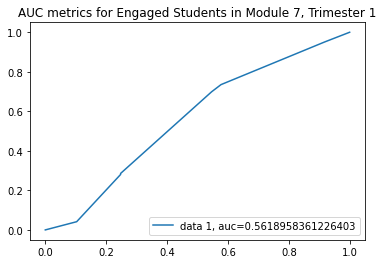

In [217]:
ylg7a_pred_proba = logregt7a.predict_proba(Xt7a_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt7a_test,  ylg7a_pred_proba)
auc = metrics.roc_auc_score(yt7a_test, ylg7a_pred_proba)
plt.title('AUC metrics for Engaged Students in Module 7, Trimester 1')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# AUC score for the case is 0.60. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.
#


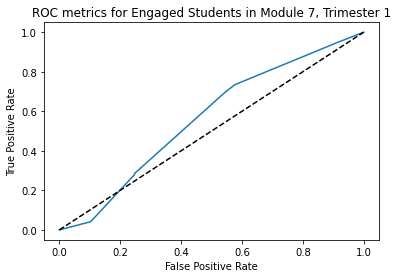

In [218]:
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(yt7a_test, ylg7a_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.title('ROC metrics for Engaged Students in Module 7, Trimester 1')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()


In [220]:
print("Accuracy:",metrics.accuracy_score(yt7a_test, yt7a_pred))
print("Precision:",metrics.precision_score(yt7a_test, yt7a_pred))
print("Recall:",metrics.recall_score(yt7a_test, yt7a_pred))
print("F1 Score",metrics.f1_score(yt7a_test, yt7a_pred))


Accuracy: 0.7987551867219918
Precision: 0.7987551867219918
Recall: 1.0
F1 Score 0.8881199538638985


In [256]:
# Instantiate the classifier
rfclffs7a = RandomForestClassifier(n_estimators =1,bootstrap ='true',criterion = 'gini',max_depth = 3,max_features =3)

# Fit to the training data
rfclffs7a.fit(Xt7a_train, yt7a_train)

# Compute accuracy
print(rfclffs7a.score(Xt7a_test, yt7a_test))


0.7987551867219918


In [257]:
# Perform 10-fold CV
cvscores_10rf = cross_val_score(rfclffs7a, Xt7a_train, yt7a_train, cv = 10)
print(np.mean(cvscores_10rf))

0.816569216182048


In [255]:
from sklearn.svm import SVC

svcfs7a = SVC(kernel ='linear',C=1.0)

#Train it, or "fit it", to the data:
svcfs7a.fit(Xt7a_train, yt7a_train)

# Compute accuracy
print(svcfs7a.score(Xt7a_test, yt7a_test))


0.7987551867219918


In [224]:
# Perform 10-fold CV
cvscores_10svc = cross_val_score(svcfs7a, Xt7a_train, yt7a_train, cv = 10)
print(np.mean(cvscores_10svc))

0.8156763590391909


In [258]:
# Create Decision Tree classifer object
dtclffs7a = DecisionTreeClassifier(max_depth =3,criterion ='gini',max_features =10)

# Train Decision Tree Classifer
dtclffs7a = dtclffs7a.fit(Xt7a_train,yt7a_train)

#Predict the response for test dataset
yfs7a_pred = dtclffs7a.predict(Xt7a_test)


In [259]:
# Compute accuracy
print(dtclffs7a.score(Xt7a_test, yt7a_test))

0.7987551867219918


In [260]:
# Perform 10-fold CV
cvscores_10dt7a = cross_val_score(dtclffs7a, Xt7a_train, yt7a_train, cv = 10)
print(np.mean(cvscores_10dt7a))

0.8147835018963339


In [230]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yt7a_test, yt7a_pred))
print(classification_report(yt7a_test, yt7a_pred))


[[  0  97]
 [  0 385]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.80      1.00      0.89       385

    accuracy                           0.80       482
   macro avg       0.40      0.50      0.44       482
weighted avg       0.64      0.80      0.71       482



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#``

In [263]:
# Instantiate bootstrap aggregation model
bagged_model = BaggingClassifier(n_estimators=50, random_state=123)

# Fit
bagged_model.fit(Xt7a_train, yt7a_train)

# Predict
bagged_pred = bagged_model.predict(Xt7a_test)

#print(logregfs1.score(Xfs_train, yfs_train))

# Print accuracy score
print(accuracy_score(yt7a_test, bagged_pred))


0.7987551867219918


In [264]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(bagged_model, Xt7a_train, yt7a_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(bagged_model, Xt7a_train, yt7a_train, cv = 10)
print(np.mean(cvscores_10))

0.8165632798573975
0.8156763590391909


In [265]:
# Boosting model
boosted_model = AdaBoostClassifier(n_estimators=50, random_state=123)

# Fit
boosted_model_fit = boosted_model.fit(Xt7a_train, yt7a_train)

# Predict
boosted_pred = boosted_model_fit.predict(Xt7a_test)

# Print model accuracy
print(accuracy_score(yt7a_test, boosted_pred))


0.7987551867219918


In [266]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(boosted_model, Xt7a_train, yt7a_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(boosted_model, Xt7a_train, yt7a_train, cv = 10)
print(np.mean(cvscores_10))

0.8165632798573975
0.8156763590391909


In [233]:
import xgboost as xgb

In [237]:
# Instantiate
xgb = XGBClassifier(random_state=123, learning_rate=0.1, n_estimators=10, max_depth=3)

# Fit
xgb = xgb.fit(Xt7a_train, yt7a_train)

# Predict
xgb_pred = xgb.predict(Xt7a_test)

# Print accuracy score
print('Final prediction score: [%.8f]' % accuracy_score(yt7a_test, xgb_pred))


Final prediction score: [0.79875519]


In [267]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(xgb, Xt7a_train, yt7a_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(xgb, Xt7a_train, yt7a_train, cv = 10)
print(np.mean(cvscores_10))

0.8156720142602496
0.8156763590391909


In [238]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yt7a_test, xgb_pred))
print(classification_report(yt7a_test, xgb_pred))


[[  0  97]
 [  0 385]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.80      1.00      0.89       385

    accuracy                           0.80       482
   macro avg       0.40      0.50      0.44       482
weighted avg       0.64      0.80      0.71       482



In [ ]:
#````

In [115]:
m7ml_subset.head()

Time User full name     Event context           ct  \
0    15:46      am5M b1HG  Course: Module 7       System   
1    05:48      am5M b1HG  Course: Module 7  User report   
2    05:48      am5M b1HG  Course: Module 7       System   
45   21:03      ajdR bQnj  Course: Module 7       System   
46   16:11      am5M b1HG  Course: Module 7       System   

                  Event name       Date First name Last name  
0              Course viewed 2019-01-18       am5M      b1HG  
1   Grade user report viewed 2019-01-15       am5M      b1HG  
2              Course viewed 2019-01-15       am5M      b1HG  
45             Course viewed 2018-12-30       ajdR      bQnj  
46             Course viewed 2018-12-28       am5M      b1HG

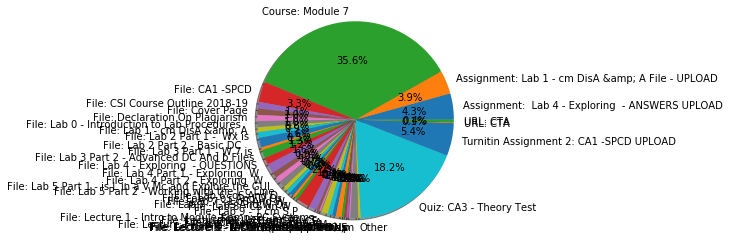

In [114]:
labels = module7ml['Event context'].astype('category').cat.categories.tolist()
counts = module7ml['Event context'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

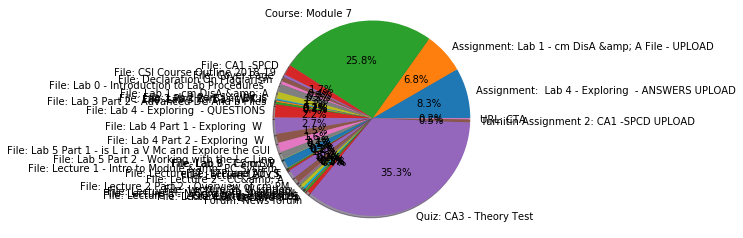

In [115]:
labels = FirstFive7['Event context'].astype('category').cat.categories.tolist()
counts = FirstFive7['Event context'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [116]:
module7ml["Event context"].value_counts()


Course: Module 7                                           1127
Quiz: CA3 - Theory Test                                     576
Turnitin Assignment 2: CA1 -SPCD UPLOAD                     170
Assignment:  Lab 4 - Exploring  - ANSWERS UPLOAD            136
Assignment: Lab 1 - cm DisA &amp; A File - UPLOAD           123
File: CA1 -SPCD                                             106
File: Lab 9 - T cm S P                                       69
File: Lab 2 Part 2 - Basic DC                                50
File: Lab 4 Part 1 - Exploring  W                            50
File: Lab 3 Part 2 - Advanced DC And b Files                 42
File: Lecture 1 - Intro to Module &amp; PC System            41
Forum: News forum                                            40
File: Lab 4 - Exploring  - QUESTIONS                         37
File: CSI Course Outline 2018-19                             34
File: Lecture 2 - CC&amp; A                                  34
File: Cover Page                        

In [117]:
FirstFive7["Event context"].value_counts()


Quiz: CA3 - Theory Test                                    566
Course: Module 7                                           414
Assignment:  Lab 4 - Exploring  - ANSWERS UPLOAD           134
Assignment: Lab 1 - cm DisA &amp; A File - UPLOAD          109
File: Lab 4 Part 1 - Exploring  W                           43
File: Lab 4 - Exploring  - QUESTIONS                        35
File: CA1 -SPCD                                             28
File: Lab 5 Part 1 - is L in a V Mc and Explore the GUI     25
File: Lecture 1 - Intro to Module &amp; PC System           24
File: Lab 4 Part 2 - Exploring  W                           24
File: Lecture 2 - CC&amp; A                                 23
File: Lab 0 - Introduction to Lab Procedures                21
File: Lab 5 Part 2 - Working with the L c Line              19
File: Lab 1 - cm DisA &amp; A                               18
File: Lecture 2 Part 2 - Overview of cm PM                  16
File: Cover Page                                       

In [118]:
module7ml["Event name"].value_counts()


Course module viewed                                      1048
Course viewed                                              963
Quiz attempt viewed                                        390
List Submissions                                           138
Quiz attempt reviewed                                      101
The status of the submission has been viewed.              100
Grade user report viewed                                    73
Submission form viewed.                                     35
Add Submission                                              32
A file has been uploaded.                                   31
A submission has been submitted.                            31
The user has accepted the statement of the submission.      31
Discussion viewed                                           29
Submission created.                                         27
Quiz attempt summary viewed                                 15
Role assigned                                          

In [119]:
FirstFive7["Event name"].value_counts()


Course module viewed                                      407
Quiz attempt viewed                                       390
Course viewed                                             344
Quiz attempt reviewed                                      94
The status of the submission has been viewed.              84
Submission form viewed.                                    35
A file has been uploaded.                                  31
A submission has been submitted.                           31
The user has accepted the statement of the submission.     31
Submission created.                                        27
Quiz attempt summary viewed                                15
Quiz attempt started                                       14
Quiz attempt submitted                                     14
User graded                                                14
User enrolled in course                                    13
Role assigned                                              13
Grade us

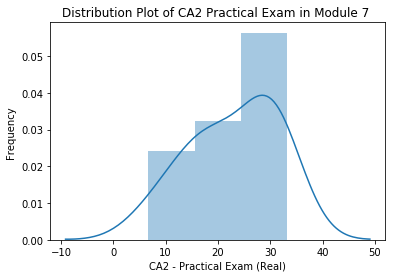

In [159]:
# Visualize the distribution of CA2 - Practical Exam (Real) in Module 7'

sns.distplot(module7mg['CA2 - Practical Exam (Real)'])
plt.title('Distribution Plot of CA2 Practical Exam in Module 7 ')
plt.ylabel('Frequency ')

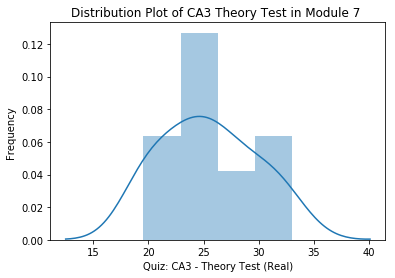

In [161]:
sns.distplot(module7mg['Quiz: CA3 - Theory Test (Real)'])
plt.title('Distribution Plot of CA3 Theory Test in Module 7 ')
plt.ylabel('Frequency ')

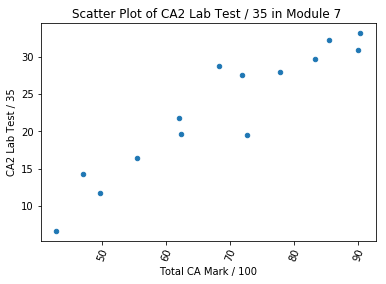

In [164]:
module7og.plot(kind='scatter', x='Total CA Mark / 100', y='CA2 Lab Test / 35', rot=70)
plt.title('Scatter Plot of CA2 Lab Test / 35 in Module 7 ')


In [166]:
module7og.head(2)

ID number First Name Surname  Total CA Mark / 100 Final Grade  \
0  tzCYvQBD       azCY    bvQB               71.850          B+   
1  FjdRQnjO       ajdR    bQnj               89.885           A   

   CA1 Report / 20  CA2 Lab Test / 35  CA3 Theory Test / 35  Labs CA / 10  \
0              8.8             27.650                 25.40         10.00   
1             16.2             30.975                 33.05          9.66   

   Wk1-Lab   ...     Wk10-CA / 1  Wk10-Lab  Wk10-Lecture  Wk11-CA / 1  \
0        1   ...             1.0         1             1         1.00   
1        1   ...             1.0         1             1         0.66   

   Wk11-Lab  Wk11-Lecture  Wk12-CA3  Wk12-Lecture  Wk15-Lecture  engaged  
0         1             1         1             1             1        1  
1         1             1         1             1             1        1  

[2 rows x 44 columns]

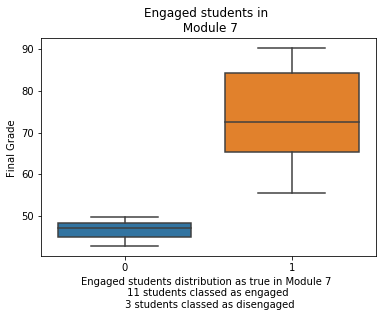

In [170]:
sns.boxplot(x = 'engaged', y = 'Total CA Mark / 100', data = module7og)
plt.title('Engaged students in \n Module 7')
plt.xlabel('Engaged students distribution as true in Module 7 \n 11 students classed as engaged \n 3 students classed as disengaged')
plt.ylabel('Final Grade ')

In [168]:
engaged7.sum()

11

In [173]:
FirstTen7.head(2)

Time User full name Affected user                    Event context  \
89   18:30      a4jV bO8M             -  File: Declaration On Plagiarism   
90   18:06      a4jV bO8M             -                 File: Cover Page   

      ct            Event name  \
89  File  Course module viewed   
90  File  Course module viewed   

                                          Description Origin IP address  \
89  The user with id '0' viewed the 'resource' act...    web  127.0.0.1   
90  The user with id '0' viewed the 'resource' act...    web  127.0.0.1   

         Date First name Last name  
89 2018-11-12       a4jV      bO8M  
90 2018-11-12       a4jV      bO8M

In [176]:
module7og.head(2)

ID number First Name Surname  Total CA Mark / 100 Final Grade  \
0  tzCYvQBD       azCY    bvQB               71.850          B+   
1  FjdRQnjO       ajdR    bQnj               89.885           A   

   CA1 Report / 20  CA2 Lab Test / 35  CA3 Theory Test / 35  Labs CA / 10  \
0              8.8             27.650                 25.40         10.00   
1             16.2             30.975                 33.05          9.66   

   Wk1-Lab   ...     Wk10-CA / 1  Wk10-Lab  Wk10-Lecture  Wk11-CA / 1  \
0        1   ...             1.0         1             1         1.00   
1        1   ...             1.0         1             1         0.66   

   Wk11-Lab  Wk11-Lecture  Wk12-CA3  Wk12-Lecture  Wk15-Lecture  engaged  
0         1             1         1             1             1        1  
1         1             1         1             1             1        1  

[2 rows x 44 columns]

In [132]:
m7ogttest = module7og

In [133]:
m7ogttest.head(2)

ID number First Name Surname  Total CA Mark / 100 Final Grade  \
0  tzCYvQBD       azCY    bvQB               71.850          B+   
1  FjdRQnjO       ajdR    bQnj               89.885           A   

   CA1 Report / 20  CA2 Lab Test / 35  CA3 Theory Test / 35  Labs CA / 10  \
0              8.8             27.650                 25.40         10.00   
1             16.2             30.975                 33.05          9.66   

   Wk1-Lab  ...  Wk10-CA / 1  Wk10-Lab  Wk10-Lecture  Wk11-CA / 1  Wk11-Lab  \
0        1  ...          1.0         1             1         1.00         1   
1        1  ...          1.0         1             1         0.66         1   

   Wk11-Lecture  Wk12-CA3  Wk12-Lecture  Wk15-Lecture  engaged  
0             1         1             1             1        1  
1             1         1             1             1        1  

[2 rows x 44 columns]

In [179]:

# Rename the columns of df2_melted: df2_tidy
m7ogttest = m7ogttest.rename(columns = {'Total CA Mark / 100': 'FinalGrade',}, inplace = False)


In [180]:
m7ogttest.head(2)

ID number First Name Surname  FinalGrade Final Grade  CA1 Report / 20  \
0  tzCYvQBD       azCY    bvQB      71.850          B+              8.8   
1  FjdRQnjO       ajdR    bQnj      89.885           A             16.2   

   CA2 Lab Test / 35  CA3 Theory Test / 35  Labs CA / 10  Wk1-Lab   ...     \
0             27.650                 25.40         10.00        1   ...      
1             30.975                 33.05          9.66        1   ...      

   Wk10-CA / 1  Wk10-Lab  Wk10-Lecture  Wk11-CA / 1  Wk11-Lab  Wk11-Lecture  \
0          1.0         1             1         1.00         1             1   
1          1.0         1             1         0.66         1             1   

   Wk12-CA3  Wk12-Lecture  Wk15-Lecture  engaged  
0         1             1             1        1  
1         1             1             1        1  

[2 rows x 44 columns]

In [188]:
# Create the density plot
#(p9.ggplot(m7ogttest)+ p9.aes('FinalGrade')+ p9.geom_density(alpha=0.5))

In [182]:
# Perform the one-sample t-test
t_result= stats.ttest_1samp(m7ogttest.FinalGrade, 100)
print(t_result)

# Test significance
alpha = 0.05
if t_result[1] < alpha:
    print("Pass ratios are significantly biased")
else:
    print("No significant bias found")


Ttest_1sampResult(statistic=-7.4271808556452115, pvalue=4.9949829654289303e-06)
Pass ratios are significantly biased


In [184]:
# Perform t-test and print result
t_result=stats.ttest_1samp(m7ogttest.FinalGrade, 55)
print(t_result)

# Test significance
alpha= 0.05
if (t_result[1] < alpha):
    print("mean value of Sample A differs from given value")
else:
	print("No significant difference found")



Ttest_1sampResult(statistic=3.1669221031228414, pvalue=0.0074257305826535844)
mean value of Sample A differs from given value


In [190]:

#Engaged = > 55
eng7 = m7ogttest['FinalGrade'] > 55


In [191]:

# Create a new column called df.engaged where the value is yes
# if df.age is greater than 55 and no if not
m7ogttest['eng'] = np.where(m7ogttest['FinalGrade']>=55, '1', '0')


In [192]:
m7ogttest['eng'] = pd.to_numeric(m7ogttest['eng'])


In [194]:

# Create a new column called df.engaged where the value is yes
# if df.age is greater than 55 and no if not
m7ogttest['diseng'] = np.where(m7ogttest['FinalGrade']<=55, '1', '0')


In [195]:
m7ogttest['diseng'] = pd.to_numeric(m7ogttest['diseng'])


In [196]:
m7ogttest.head(2)

ID number First Name Surname  FinalGrade Final Grade  CA1 Report / 20  \
0  tzCYvQBD       azCY    bvQB      71.850          B+              8.8   
1  FjdRQnjO       ajdR    bQnj      89.885           A             16.2   

   CA2 Lab Test / 35  CA3 Theory Test / 35  Labs CA / 10  Wk1-Lab   ...    \
0             27.650                 25.40         10.00        1   ...     
1             30.975                 33.05          9.66        1   ...     

   Wk10-Lecture  Wk11-CA / 1  Wk11-Lab  Wk11-Lecture  Wk12-CA3  Wk12-Lecture  \
0             1         1.00         1             1         1             1   
1             1         0.66         1             1         1             1   

   Wk15-Lecture  engaged  eng  diseng  
0             1        1    1       0  
1             1        1    1       0  

[2 rows x 46 columns]

In [204]:
#Fisher exact
table = pd.crosstab(m7ogttest.eng,m7ogttest.diseng)
print(table)


diseng   0  1
eng          
0        0  3
1       11  0


In [206]:
chi = stats.fisher_exact(table,alternative = 'two-sided')
print(chi[1])
# Output are p value with index 1

0.00274725274725


In [209]:
# Is the result significant?
alpha = 0.05
if chi[1] < alpha:
    print("Proportions of engagement differ significantly")
else:
    print("No significant difference in proportions of engagement found")

Proportions of engagement differ significantly


In [200]:
chi = stats.chisquare(eng7)
print(chi)


Power_divergenceResult(statistic=3.0, pvalue=0.99793431736954785)


In [207]:
# Extract engaged ratio
engratio = m7ogttest['eng'].value_counts()

# Perform Chi-square test
chi= stats.chisquare(engratio)
print(chi)

# Test significance
alpha= 0.05
if chi[1] < alpha:
    print("Difference between engaged is statistically significant")
else:
    print("No significant difference between engaged found")


Power_divergenceResult(statistic=4.5714285714285712, pvalue=0.032509444645719456)
Difference between engaged is statistically significant


In [211]:
# Perform Shapiro-Wilk test on Engagement and print result
shapiro = stats.shapiro(m7ogttest.eng)
print(shapiro)


(0.5157217979431152, 7.890827873779926e-06)


In [213]:
# Perform Shapiro-Wilk test on Engagement and print result
shapirodis = stats.shapiro(m7ogttest.diseng)
print(shapirodis)


(0.5157219767570496, 7.890827873779926e-06)


In [212]:
# Perform Wilcoxon Signed-Rank test
wilcsr = stats.wilcoxon(m7ogttest.eng,m7ogttest.diseng)
print(wilcsr)
#Look at the p-values from the Wilcoxon test. Note that they are actually (more significant)

WilcoxonResult(statistic=22.5, pvalue=0.032509444645719511)


In [215]:
X57s.head(2)

Event name_A file has been uploaded.  \
0                                     0   
1                                     0   

   Event name_A submission has been submitted.  \
0                                            0   
1                                            0   

   Event name_Badge listing viewed  \
0                                0   
1                                0   

   Event name_Course module instance list viewed  \
0                                              0   
1                                              0   

   Event name_Course module viewed  Event name_Course user report viewed  \
0                                1                                     0   
1                                0                                     0   

   Event name_Course viewed  Event name_Discussion viewed  \
0                         0                             0   
1                         1                             0   

   Event name_Grade user report viewed  Event name_List Submissions  \
0                                    0                            0   
1                                    0                            0   

        ...        Event context_URL: CTA    ct_Assignment  ct_File  \
0       ...                               0              0        1   
1       ...                               0              0        0   

   ct_File submissions  ct_Forum  ct_Quiz  ct_System  \
0                    0         0        0          0   
1                    0         0        0          1   

   ct_Turnitin Assignment 2  ct_URL  ct_User report  
0                         0       0               0  
1                         0       0               0  

[2 rows x 71 columns]

In [216]:
testspear = X57s

In [ ]:
testspear = testspear.rename(columns = {'Total CA Mark / 100': 'FinalGrade',}, inplace = False)


In [221]:
testspear = testspear.rename(columns = {'Event context_Quiz: CA3 - Theory Test': 'QuizCA3TheoryTest',}, inplace = False)


In [222]:
testspear.columns

Index(['Event name_A file has been uploaded.',
       'Event name_A submission has been submitted.',
       'Event name_Badge listing viewed',
       'Event name_Course module instance list viewed',
       'Event name_Course module viewed',
       'Event name_Course user report viewed', 'Event name_Course viewed',
       'Event name_Discussion viewed', 'Event name_Grade user report viewed',
       'Event name_List Submissions', 'Event name_Quiz attempt reviewed',
       'Event name_Quiz attempt started', 'Event name_Quiz attempt submitted',
       'Event name_Quiz attempt summary viewed',
       'Event name_Quiz attempt viewed', 'Event name_Role assigned',
       'Event name_Submission created.', 'Event name_Submission form viewed.',
       'Event name_Submission updated.',
       'Event name_The status of the submission has been viewed.',
       'Event name_The user has accepted the statement of the submission.',
       'Event name_User enrolled in course', 'Event name_User graded',
 

In [223]:
# Perform Spearman correlation
spearcorr = stats.spearmanr(testspear.QuizCA3TheoryTest, y57s)
print(spearcorr)


SpearmanrResult(correlation=-0.10914188463307847, pvalue=1.1749700137810087e-05)


In [224]:
#MissingValues

In [225]:
merge_subset7_nullity = merge_subset7.isnull()

In [226]:
merge_subset7_nullity.mean() * 100


# Calculate percentage of missing values
missing_values_percent = merge_subset7_nullity.mean() * 100
print('Percentage of Missing Values:\n', missing_values_percent)

# 0 percent of missing values

Percentage of Missing Values:
 Time                                                                 0.0
User full name                                                       0.0
Date                                                                 0.0
First name                                                           0.0
Last name                                                            0.0
Event name_A file has been uploaded.                                 0.0
Event name_A submission has been submitted.                          0.0
Event name_Add Submission                                            0.0
Event name_Badge listing viewed                                      0.0
Event name_Course module instance list viewed                        0.0
Event name_Course module viewed                                      0.0
Event name_Course user report viewed                                 0.0
Event name_Course viewed                                             0.0
Event name_Discussio

In [227]:
# Perform Shapiro-Wilk test on Engagement and print result
shapirodis = stats.shapiro(merge_subset7.engaged)
print(shapirodis)

(0.5071585178375244, 0.0)


In [228]:
# Perform Shapiro-Wilk test on Engagement and print result
shapirodis = stats.shapiro(merge_subset7_tri.engaged)
print(shapirodis)

(0.4777364134788513, 0.0)


In [118]:
Powerfeatselect7 = merge_subset7[['Event name_Grade user report viewed','ct_User report','Event context_Course: Module 7','Event name_List Submissions','Event context_Turnitin Assignment 2: CA1 -SPCD UPLOAD','ct_Turnitin Assignment 2','Event context_File: Lecture 10 - S','Event name_Course viewed','ct_System','Event name_Quiz attempt reviewed','engaged']]

In [119]:
Powerfeatselect7.groupby(['engaged']).mean()

Event name_Grade user report viewed  ct_User report  \
engaged                                                        
0                                   0.004380        0.004380   
1                                   0.028203        0.028203   

         Event context_Course: Module 7  Event name_List Submissions  \
engaged                                                                
0                              0.287591                     0.065693   
1                              0.374698                     0.037470   

         Event context_Turnitin Assignment 2: CA1 -SPCD UPLOAD  \
engaged                                                          
0                                                 0.077372       
1                                                 0.047139       

         ct_Turnitin Assignment 2  Event context_File: Lecture 10 - S  \
engaged                                                                 
0                        0.077372                            0.010219   
1                        0.047139                            0.002820   

         Event name_Course viewed  ct_System  Event name_Quiz attempt reviewed  
engaged                                                                         
0                        0.258394   0.283212                          0.045255  
1                        0.316680   0.341660                          0.028203

In [134]:
Powerfeatselect777 = merge_subset7[['Event context_Quiz: CA3 - Theory Test','ct_Quiz','Event name_Quiz attempt reviewed','Event name_Quiz attempt viewed','Event name_Course viewed','Event context_File: Lecture 11 - ITP and Adv T','Event context_File: Lab 9 - T cm S P','Event context_File: Lecture 10 - S','Event context_Course: Module 7','ct_System','engaged']]

In [135]:
Powerfeatselect777.groupby(['engaged']).mean()

Event context_Quiz: CA3 - Theory Test   ct_Quiz  \
engaged                                                    
0                                     0.204380  0.204380   
1                                     0.175665  0.175665   

         Event name_Quiz attempt reviewed  Event name_Quiz attempt viewed  \
engaged                                                                     
0                                0.045255                        0.138686   
1                                0.028203                        0.118856   

         Event name_Course viewed  \
engaged                             
0                        0.258394   
1                        0.316680   

         Event context_File: Lecture 11 - ITP and Adv T  \
engaged                                                   
0                                              0.004380   
1                                              0.002417   

         Event context_File: Lab 9 - T cm S P  \
engaged                                         
0                                    0.024818   
1                                    0.020951   

         Event context_File: Lecture 10 - S  Event context_Course: Module 7  \
engaged                                                                       
0                                  0.010219                        0.287591   
1                                  0.002820                        0.374698   

         ct_System  
engaged             
0         0.283212  
1         0.341660

In [122]:
from scipy.stats import mannwhitneyu
mannwhitneyu(Powerfeatselect7.engaged, m7og.engaged)

MannwhitneyuResult(statistic=22124.5, pvalue=0.49282140500864408)

In [121]:
# Perform Wilcoxon Signed-Rank test
wilcsr = stats.wilcoxon(Powerfeatselect7.engaged,m7og.engaged)
print(wilcsr)
#Look at the p-values from the Wilcoxon test. Note that they are actually (more significant)

ValueError: Unequal N in wilcoxon.  Aborting.

In [124]:
Powerfeatselect7['engaged']

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      0
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      0
28      1
29      1
       ..
3137    1
3138    1
3139    1
3140    1
3141    1
3142    1
3143    1
3144    1
3145    1
3146    1
3147    1
3148    1
3149    1
3150    1
3151    1
3152    1
3153    1
3154    1
3155    0
3156    0
3157    0
3158    1
3159    1
3160    1
3161    1
3162    1
3163    1
3164    1
3165    1
3166    1
Name: engaged, Length: 3167, dtype: int64

In [125]:
m7og['engaged']

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     0
10    1
11    0
12    1
13    0
Name: engaged, dtype: int64

In [110]:
final7 = module7og['Total CA Mark / 100']

In [111]:
final7.head(2)

0    71.850
1    89.885
Name: Total CA Mark / 100, dtype: float64

In [112]:
mean_grades, sims = [], 1000


In [113]:
for i in range(sims):
    temp_sample = np.random.choice(final7, replace=True, size=len(final7))
    sample_mean = np.mean(temp_sample)
    mean_grades.append(sample_mean)

In [114]:
# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_grades)
boot_95_ci = np.percentile(mean_grades, [2.5, 97.5])
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(boot_mean, boot_95_ci))

Bootstrapped Mean Length = 68.27767178571428, 95% CI = [ 60.11924196  76.49610179]
